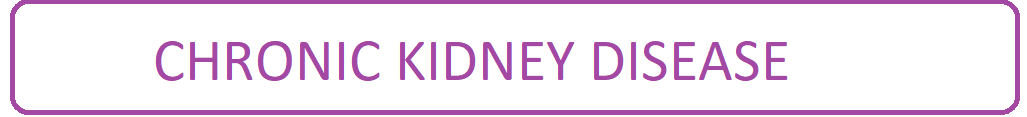

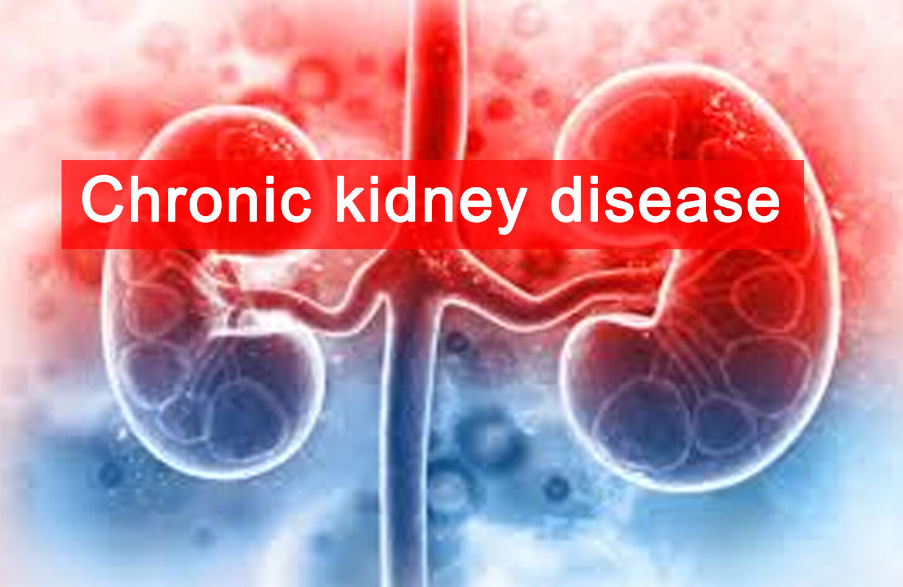

# 🎯About dataset

The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. Use machine learning techniques to predict if a patient is suffering from a chronic kidney disease or not

# 🎯Algorithms  Employed

- 🎯 Binary class Logistic Regression
- 🎯 Decision Tree Classifier
- 🎯 Bagging Classifier
- 🎯 Random Forest Classifier
- 🎯 KNearestNeighbour Classifier
- 🎯 Boosting Classifier
- 🎯 Support Vector Machine

# -------------------------------------
## Kidney disease Dataset features
# ------------------------------------
### 1. Features:
### id -id
### age -age
### bp -blood pressure
### sg -specific gravity
### al -albumin
### su -sugar
### rbc -red blood cells
### pc - pus cell
### pcc -pus cell clumps
### ba -bacteria
### bgr -blood glucose random
### bu -blood urea
### sc -serum creatinine
### sod -sodium
### pot -potassium
### hemo -haemoglobin
### pcv -packed cell volume
### wc -white blood cell count
### rc -red blood cell count
### htn -hypertension
### dm -diabetes mellitus
### cad -coronary artery disease
### appet -appetite
### pe -pedal edema
### ane -anemia
### classification - {ckd : having chronic kidney disease, notckd : having chronic kidney disease}

# 🎯Importing Libraries

In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 🎯LOAD AND READ DATASET

In [62]:
dataset=pd.read_csv('kidney_disease.csv')

In [63]:
dataset.drop('id',axis=1,inplace=True)

## 🎯Finding Unique values

In [64]:
for i in dataset.columns:
   print(" "*25)
   print(" "*25,i)
   print('*'*75)
   print(dataset[i].unique())

                         
                          age
***************************************************************************
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
                         
                          bp
***************************************************************************
[ 80.  50.  70.   0.  90.  nan 100.  60. 110. 140. 180. 120.]
                         
                          sg
***************************************************************************
[1.02  1.01  1.005 1.015   nan 1.025]
                         
                          al
***************************************************************************
[ 1.  4.  2.  3.  0. nan  5.]
                         
     

In [65]:
dataset['classification']=np.where(dataset['classification']=='ckd\t','ckd',dataset['classification'])

In [66]:
dataset['cad']=np.where(dataset['cad']=='\tno','no',dataset['cad'])

In [67]:
dataset['dm']=np.where((dataset['dm']=='no')|(dataset['dm']=='\tno'),'no','yes')

In [68]:
dataset['rc']=np.where(dataset['rc']=='\t?',dataset['rc'].mode().iloc[0],dataset['rc'])

In [69]:
dataset['pcv']=np.where(dataset['pcv']=='\t?',dataset['pcv'].mode().iloc[0],dataset['rc'])
dataset['pcv']=np.where(dataset['pcv']=='\t43','43',dataset['rc'])

In [70]:
dataset['wc']=np.where(dataset['wc']=='\t?',dataset['pcv'].mode().iloc[0],dataset['wc'])
dataset['wc']=np.where(dataset['wc']=='\t6200','6200',dataset['wc'])
dataset['wc']=np.where(dataset['wc']=='\t8400','8400',dataset['wc'])

In [71]:
for i in dataset.columns:
   print(" "*25)
   print(" "*25,i)
   print('*'*75)
   print(dataset[i].unique())

                         
                          age
***************************************************************************
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
                         
                          bp
***************************************************************************
[ 80.  50.  70.   0.  90.  nan 100.  60. 110. 140. 180. 120.]
                         
                          sg
***************************************************************************
[1.02  1.01  1.005 1.015   nan 1.025]
                         
                          al
***************************************************************************
[ 1.  4.  2.  3.  0. nan  5.]
                         
     

In [72]:
dataset['rc']=pd.to_numeric(dataset['rc'])
dataset['wc']=pd.to_numeric(dataset['wc'])
dataset['pcv']=pd.to_numeric(dataset['pcv'])

# 🎯Descriptive statistics(Univariate analysis)

In [73]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.000,55.00,64.50,90.000
bp,388.0,76.082474,14.736739,0.000,70.000,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.010,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.000,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.000,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.000,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.000,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.900,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.000,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.800,4.40,4.90,47.000


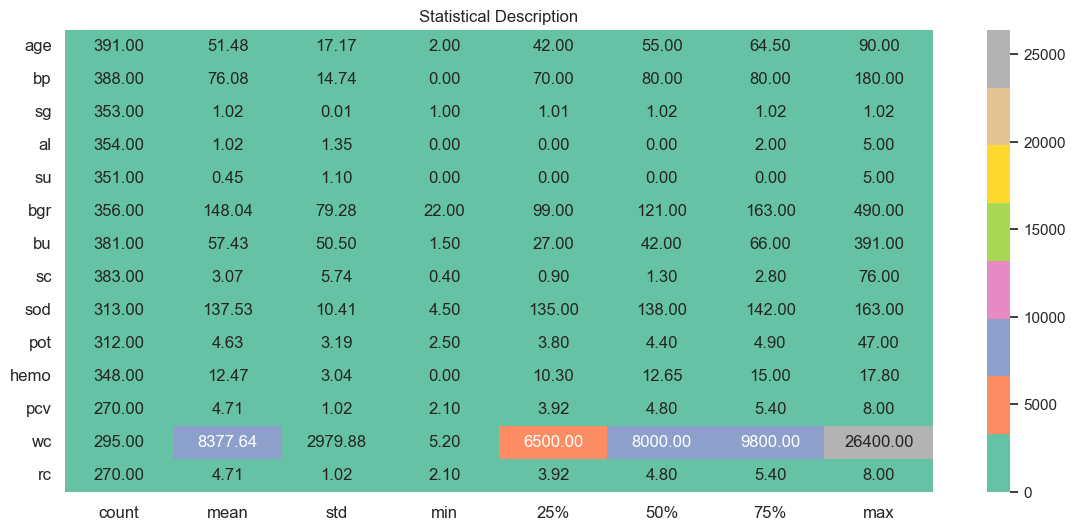

In [74]:
def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index=df.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(dataset)

### 👉Change zero value of hemo,al,su,bp into nan

In [75]:
dataset['hemo']=dataset['hemo'].replace(0,np.nan)
dataset['al']=dataset['al'].replace(0,np.nan)
dataset['su']=dataset['su'].replace(0,np.nan)
dataset['bp']=dataset['bp'].replace(0,np.nan)

# 🎯Check Null Values

In [76]:
dataset.isnull().sum()/len(dataset)*100

age                2.25
bp                 3.50
sg                11.75
al                61.25
su                84.75
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.50
pcv               32.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.00
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [77]:
numerics=dataset.select_dtypes(exclude='object')

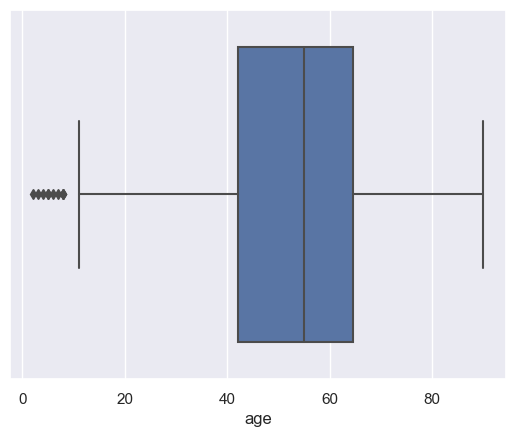

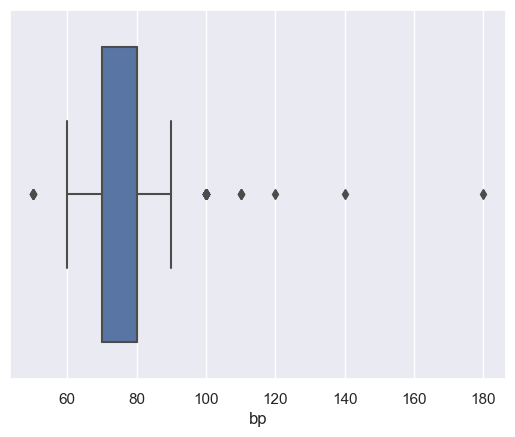

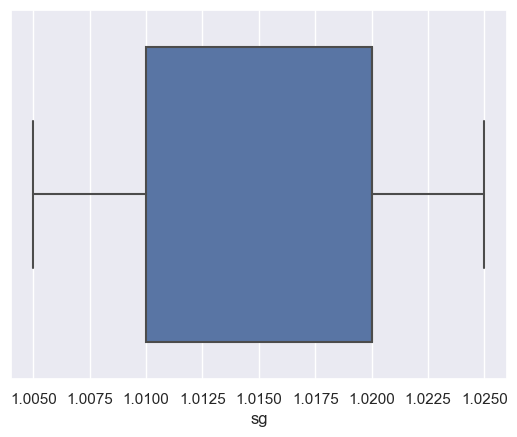

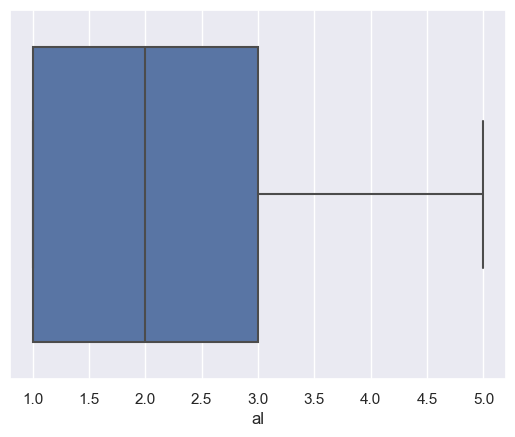

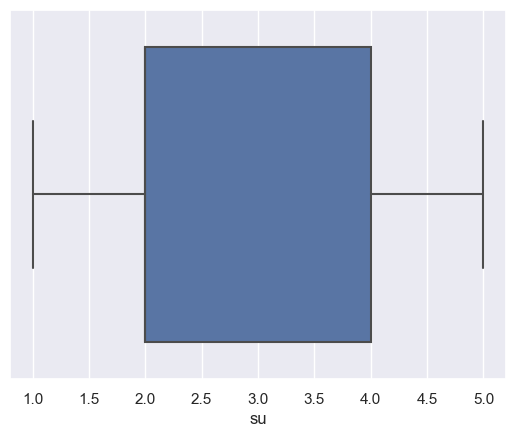

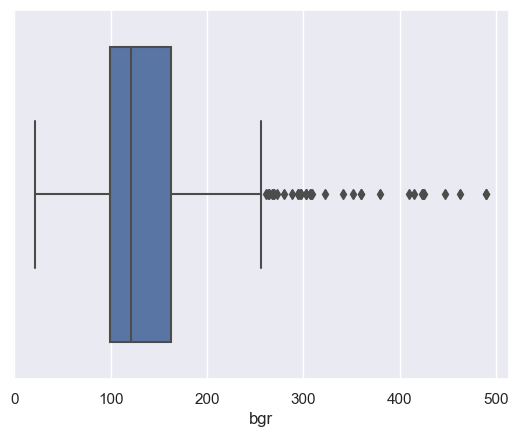

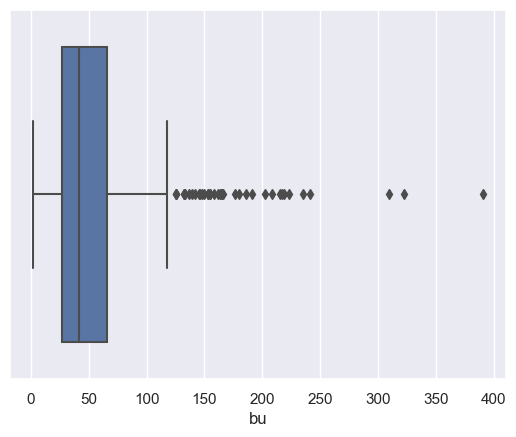

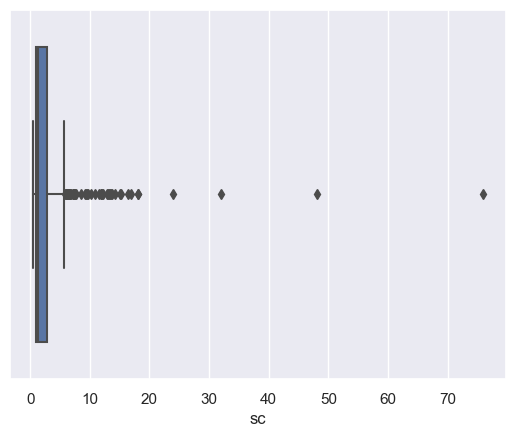

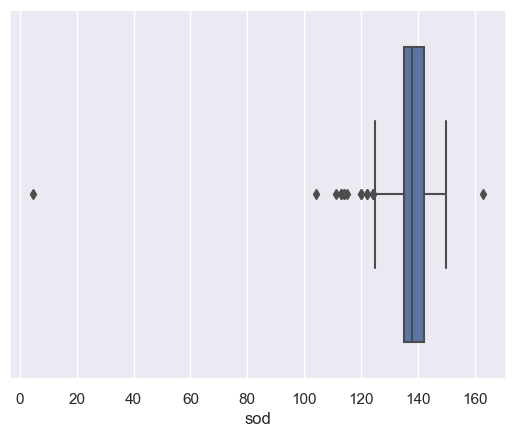

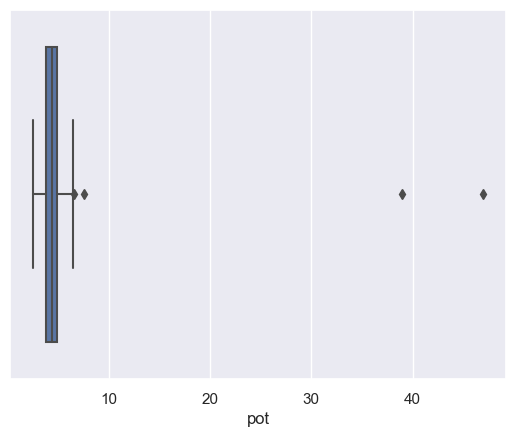

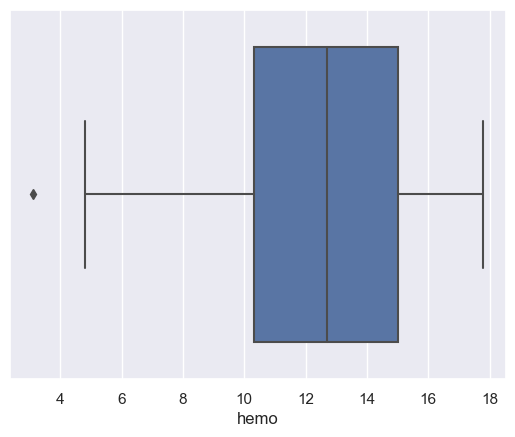

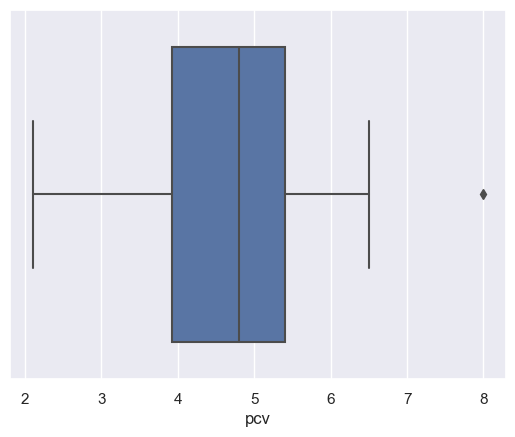

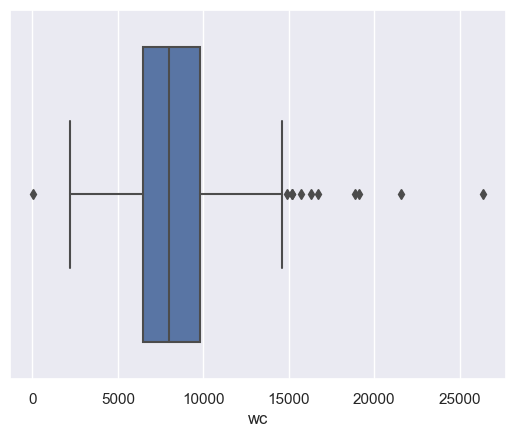

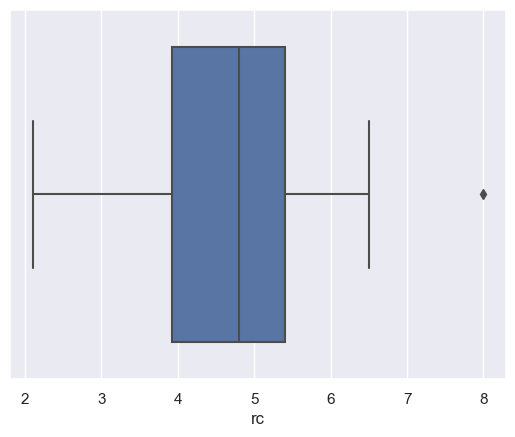

In [81]:
def boxplots(col):
    sns.boxplot(x=col,data=dataset)
    plt.show()
for i in (numerics.columns):
    boxplots(i)

In [82]:
def missing(col):
    dataset[col]=dataset[col].fillna(dataset[col].median())
for i in numerics:
    missing(i)

In [85]:
def missing(col):
    dataset[col]=dataset[col].fillna(dataset[col].mode().iloc[0])
for i in (dataset.select_dtypes(include='object').columns):
    missing(i)

In [86]:
dataset.isnull().sum()/len(dataset)*100

age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

### 👉No outlier handling as it is clinical sector data 

## 🎯Encoding

In [87]:
def impute(col):
    dataset[col]=dataset[col].astype('category')
    dataset[col]=dataset[col].cat.codes

for i in dataset.columns:
    impute(i)

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             400 non-null    int8 
 1   bp              400 non-null    int8 
 2   sg              400 non-null    int8 
 3   al              400 non-null    int8 
 4   su              400 non-null    int8 
 5   rbc             400 non-null    int8 
 6   pc              400 non-null    int8 
 7   pcc             400 non-null    int8 
 8   ba              400 non-null    int8 
 9   bgr             400 non-null    int16
 10  bu              400 non-null    int8 
 11  sc              400 non-null    int8 
 12  sod             400 non-null    int8 
 13  pot             400 non-null    int8 
 14  hemo            400 non-null    int8 
 15  pcv             400 non-null    int8 
 16  wc              400 non-null    int8 
 17  rc              400 non-null    int8 
 18  htn             400 non-null  

In [89]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,40,3,3,0,1,1,1,0,0,48,...,30,36,30,1,1,0,0,0,0,0
1,5,0,3,3,1,1,1,0,0,48,...,26,20,26,0,0,0,0,0,0,0
2,54,3,1,1,2,1,1,0,0,140,...,26,34,26,0,1,0,1,0,1,0
3,40,2,0,3,1,1,0,1,0,44,...,17,26,17,1,0,0,1,1,1,0
4,43,3,1,1,1,1,1,0,0,33,...,24,32,24,0,0,0,0,0,0,0


# 🎯Split data into Dependent and Independent variables

In [90]:
x=dataset.drop('classification',axis=1)
y=dataset['classification']

In [91]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,3,3,0,1,1,1,0,0,48,...,89,30,36,30,1,1,0,0,0,0
1,5,0,3,3,1,1,1,0,0,48,...,48,26,20,26,0,0,0,0,0,0
2,54,3,1,1,2,1,1,0,0,140,...,31,26,34,26,0,1,0,1,0,1
3,40,2,0,3,1,1,0,1,0,44,...,47,17,26,17,1,0,0,1,1,1
4,43,3,1,1,1,1,1,0,0,33,...,51,24,32,24,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,1,1,1,1,0,0,64,...,92,27,26,27,0,0,0,0,0,0
396,34,2,4,1,1,1,1,0,0,3,...,100,40,36,40,0,0,0,0,0,0
397,8,3,3,1,1,1,1,0,0,27,...,93,32,25,32,0,0,0,0,0,0
398,11,1,4,1,1,1,1,0,0,41,...,77,37,31,37,0,0,0,0,0,0


In [92]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int8

# 🎯Imbalance data check

In [93]:
y.value_counts()

0    250
1    150
Name: classification, dtype: int64

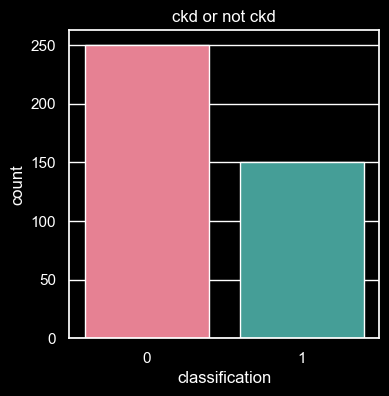

In [94]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= dataset.classification , data= dataset, palette ='husl')
ax.set_title('ckd or not ckd')
plt.show()

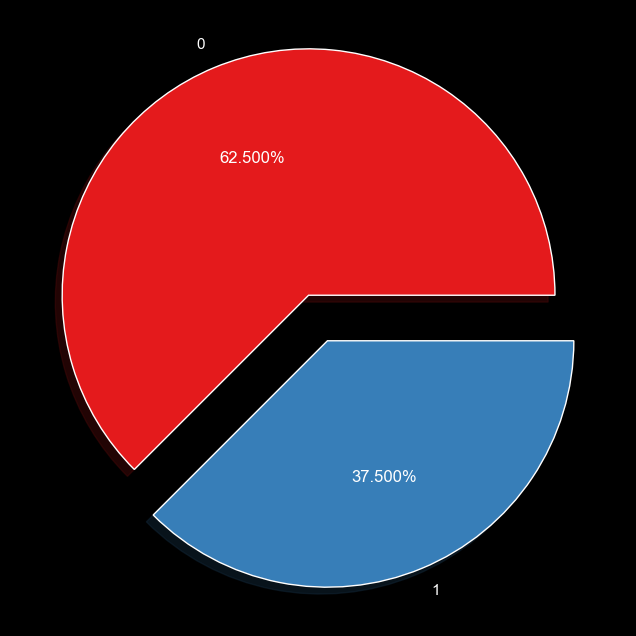

In [95]:
plt.figure(figsize=(8,8),dpi=100)
plt.pie(dataset['classification'].value_counts()*100/len(dataset),
        labels=dataset['classification'].value_counts().index,
        autopct='%.3f%%',shadow=True,explode=[0.1 for i in range(2)],colors=sns.color_palette('Set1'))
plt.show()


### 📌Balanced data so no need to balance it

# 🎯Feature Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler((-1,1))
x_sc=sc.fit_transform(x)

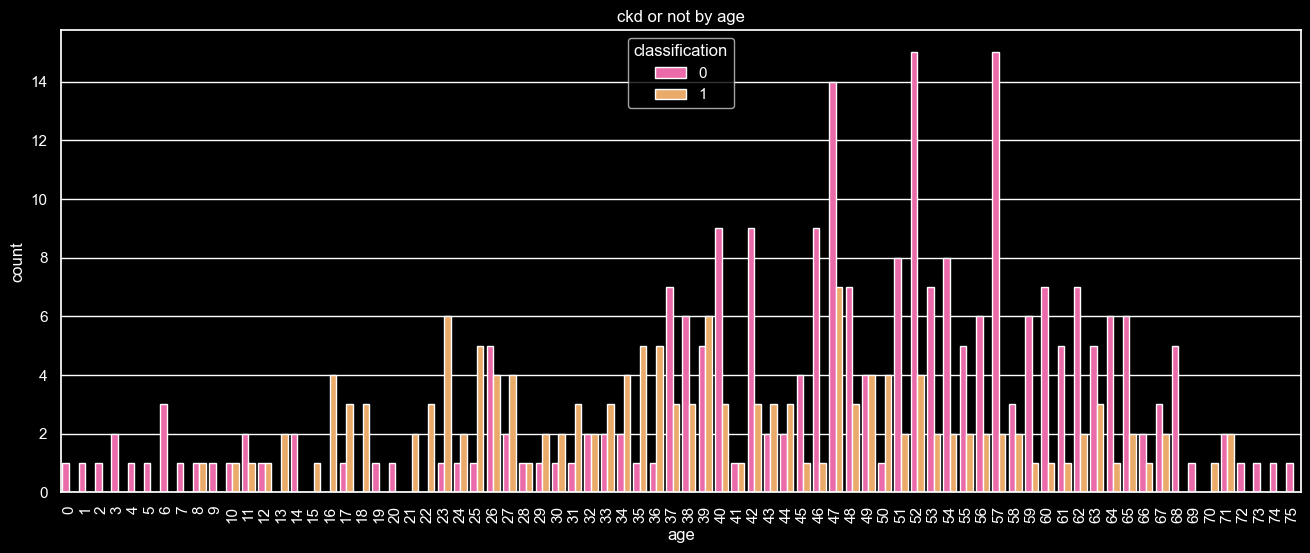

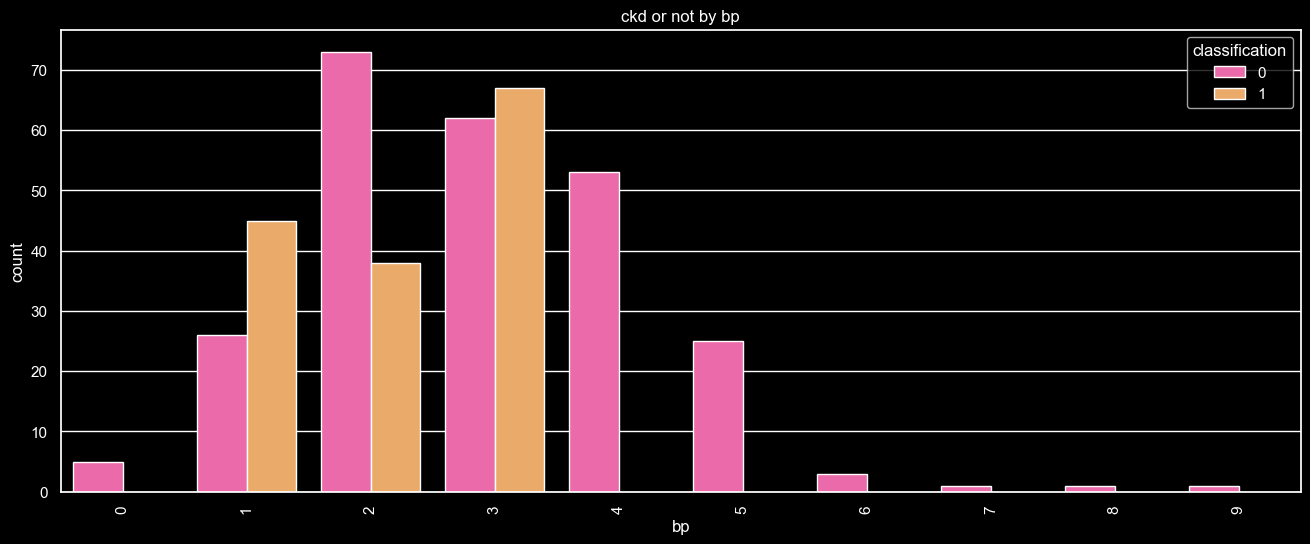

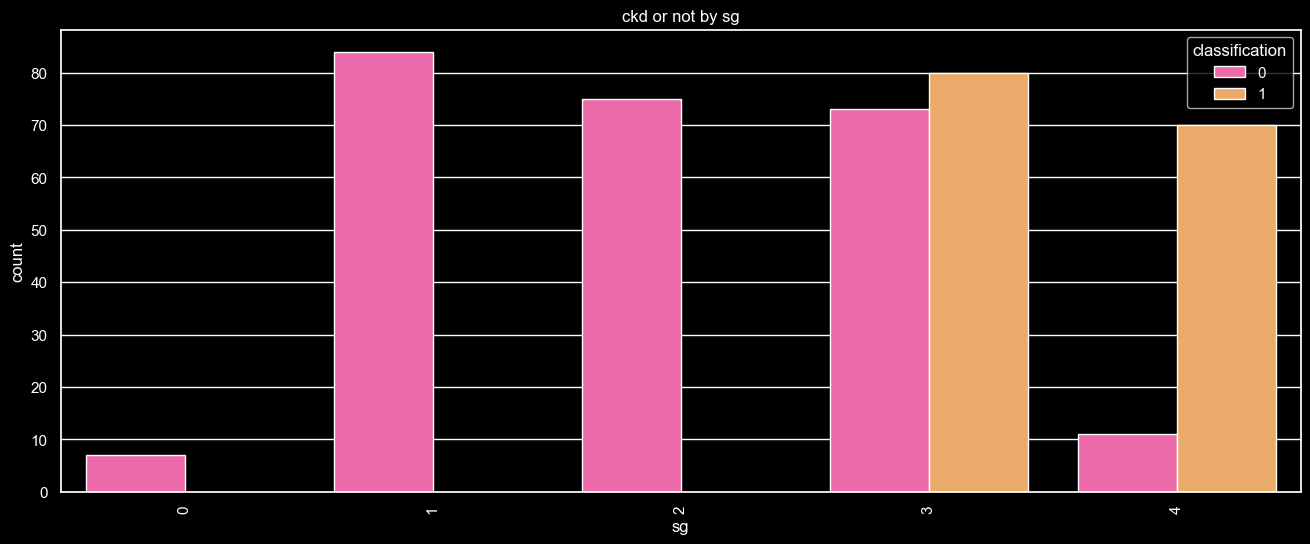

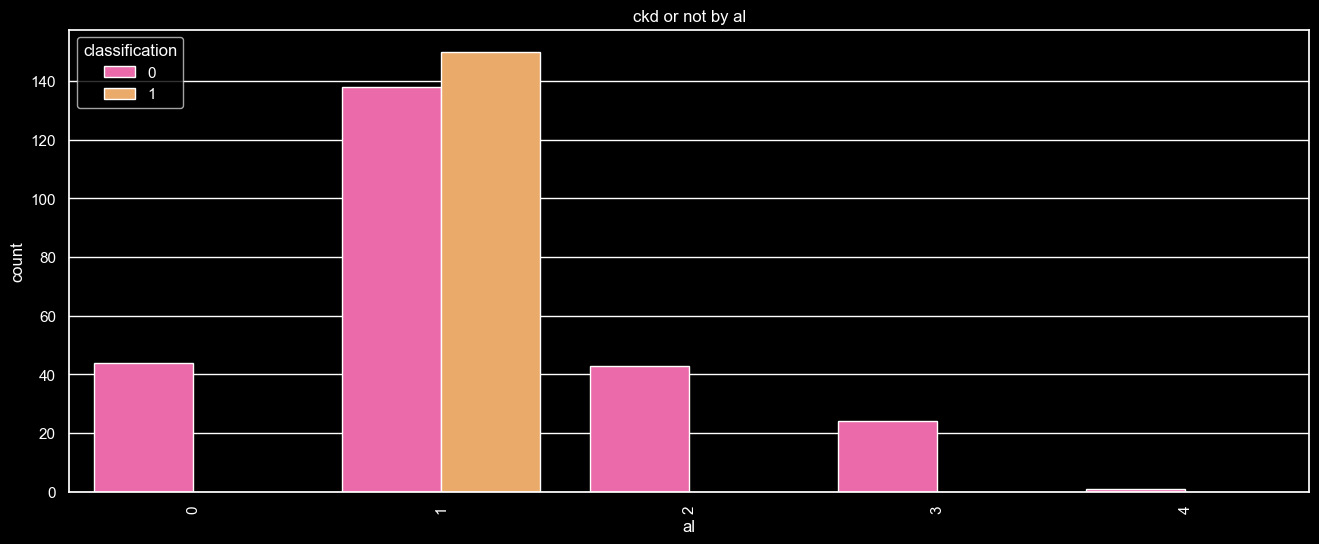

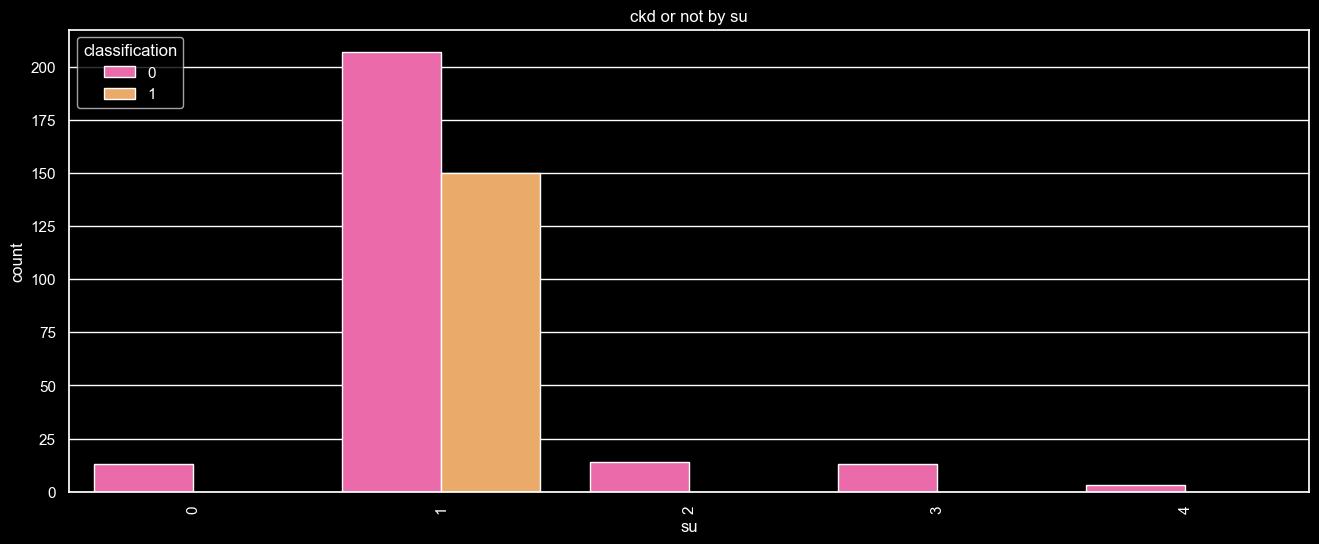

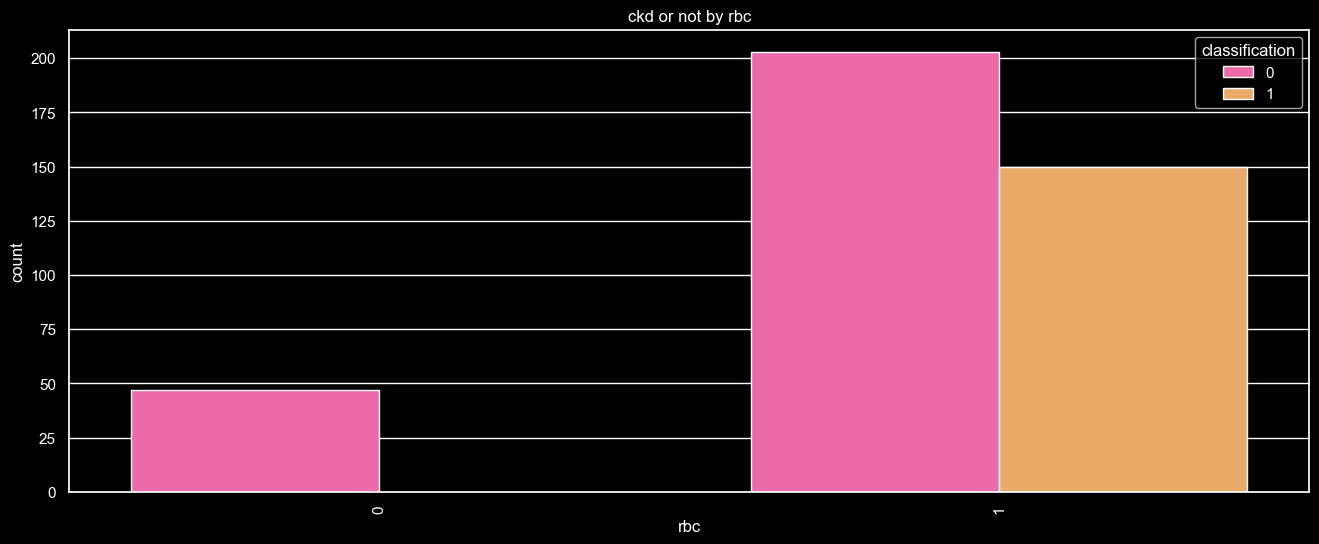

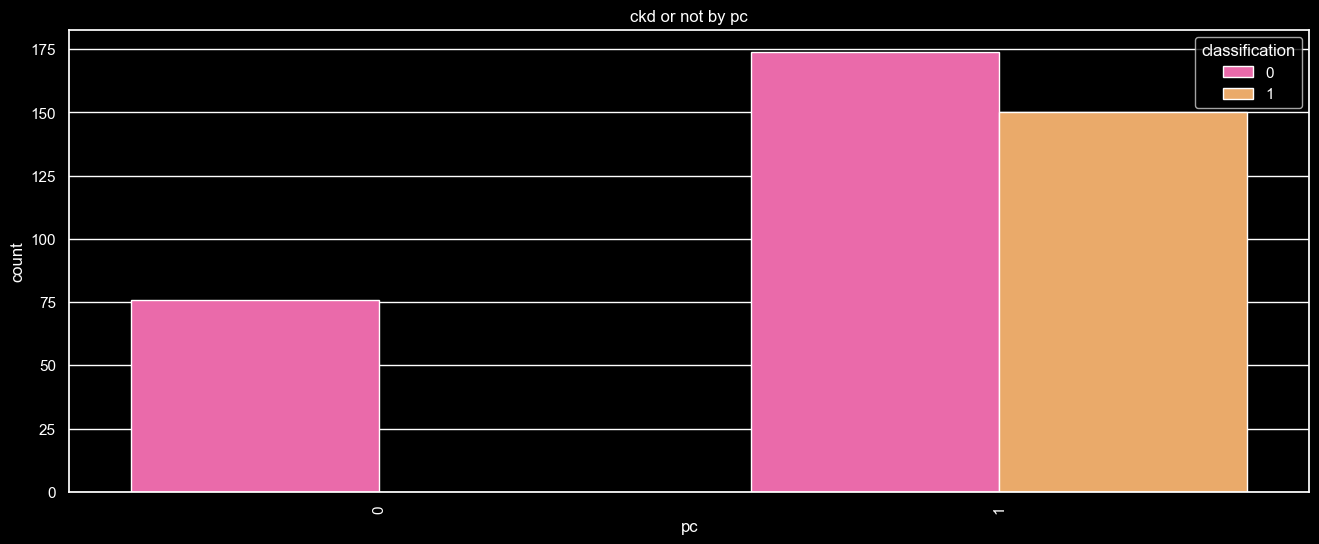

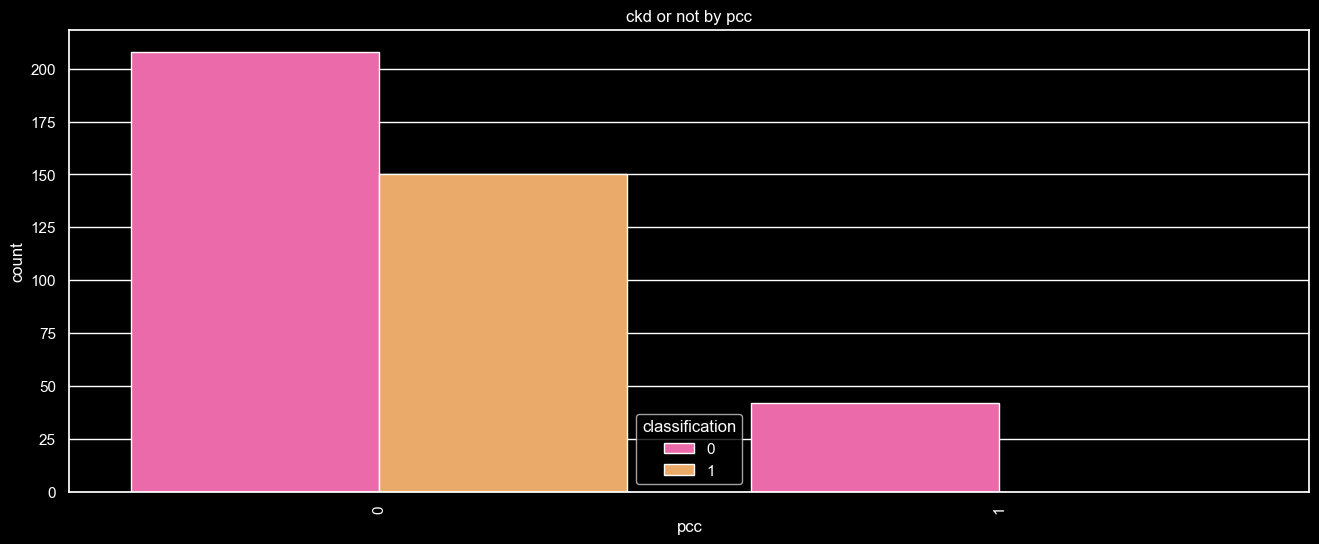

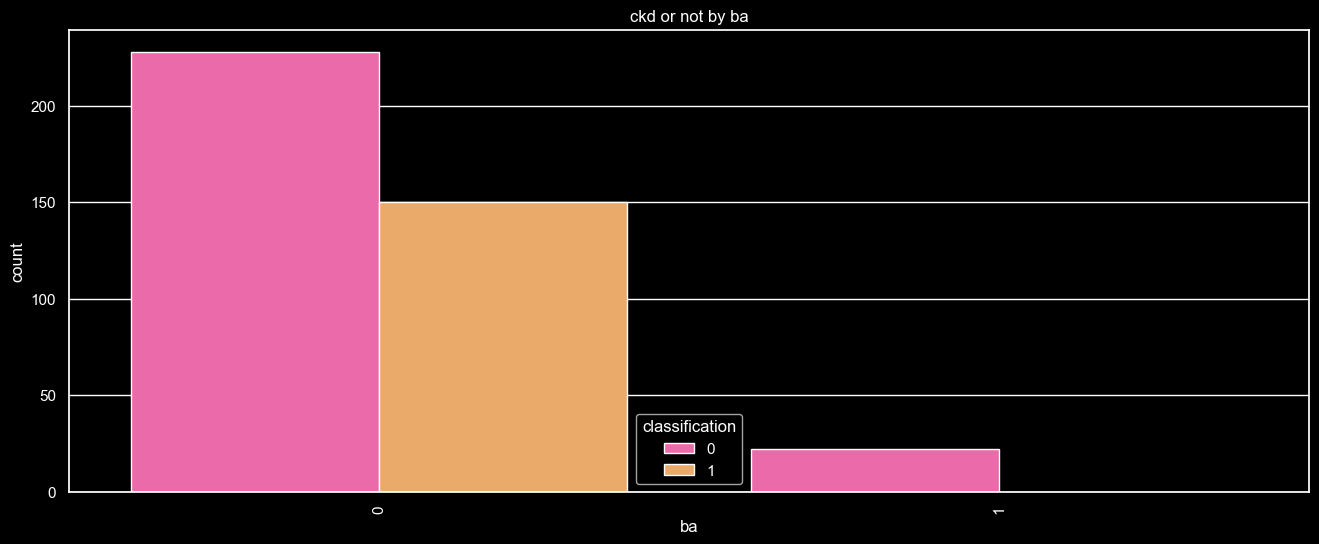

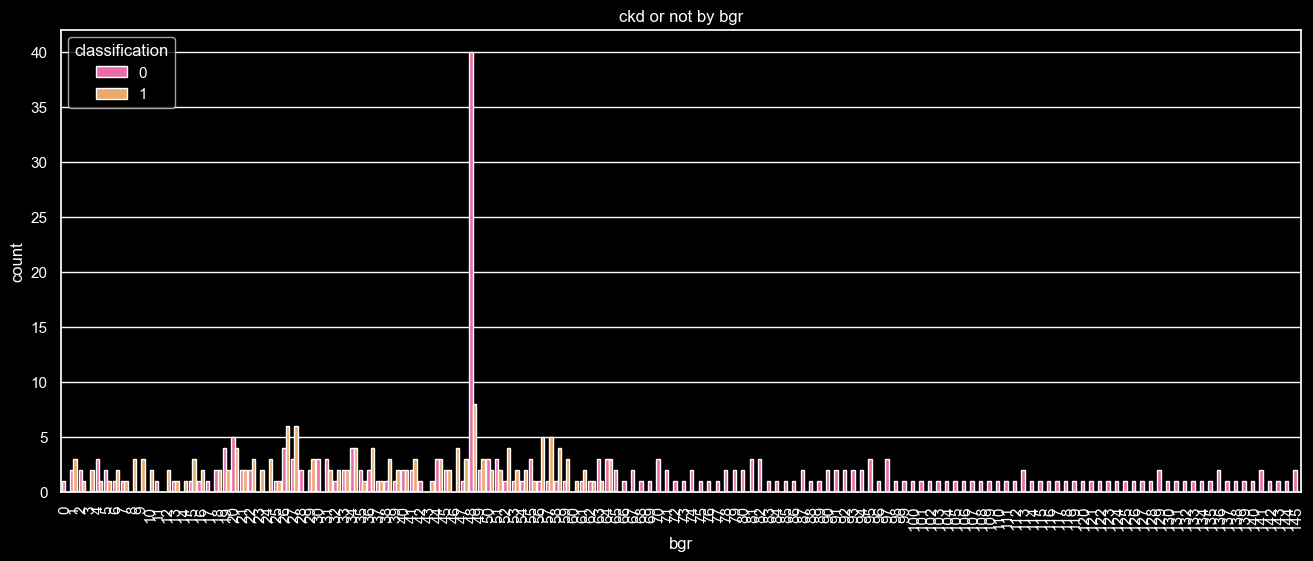

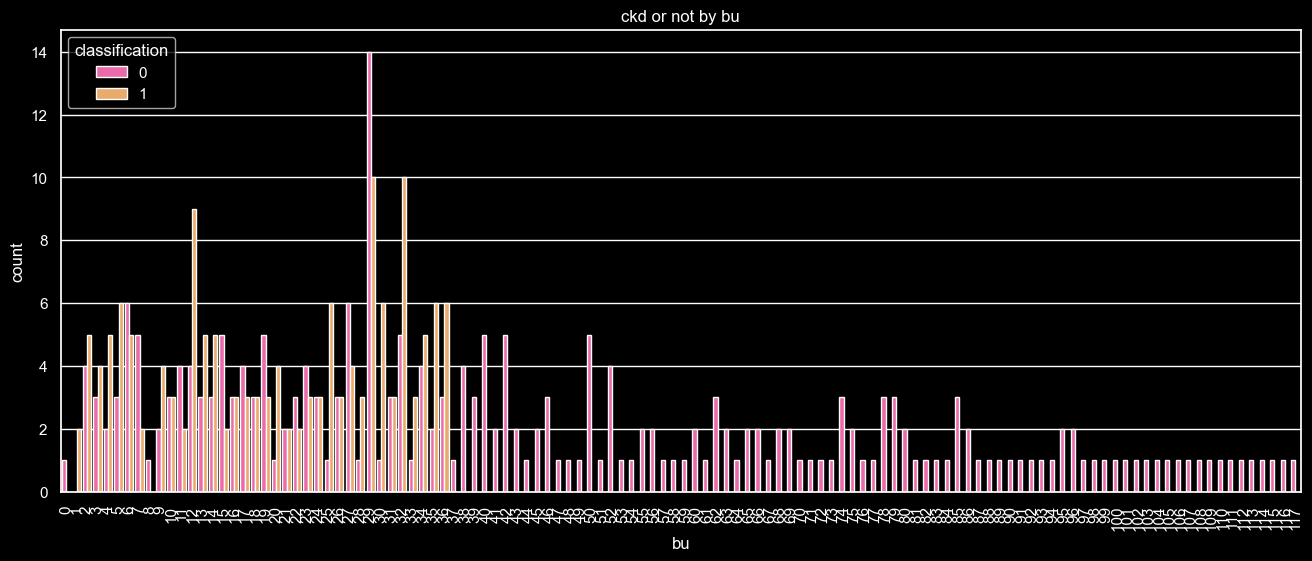

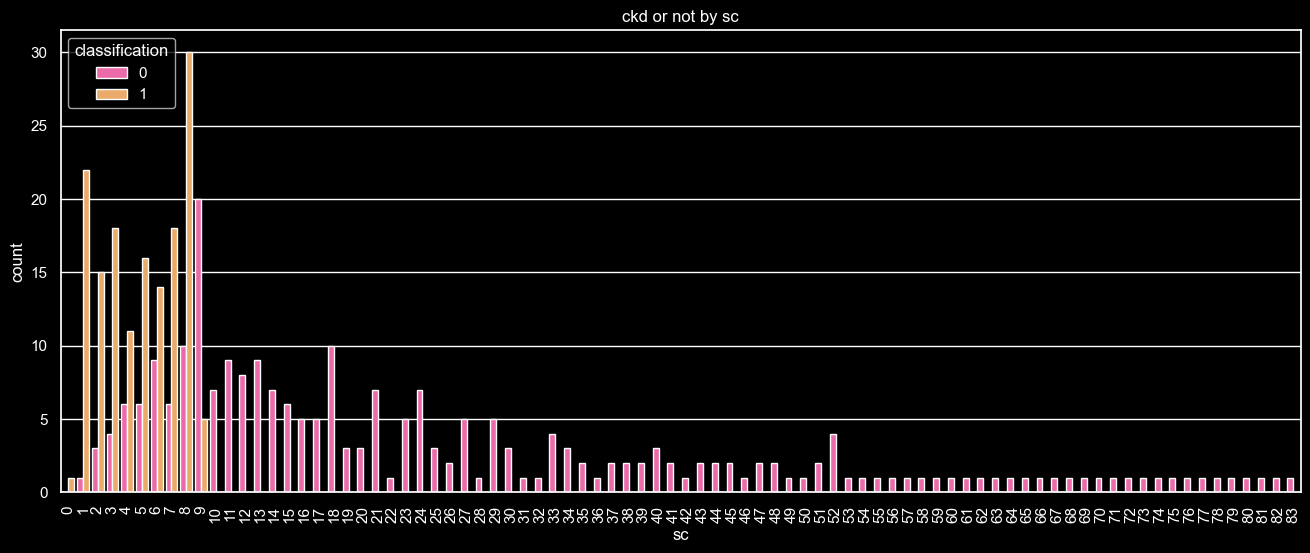

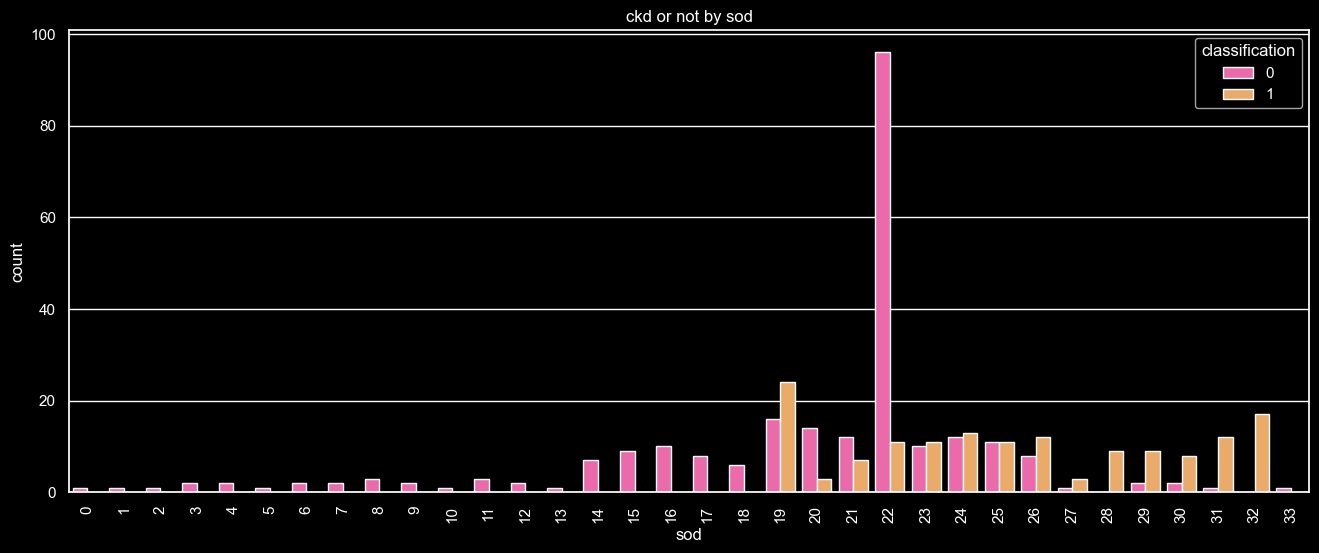

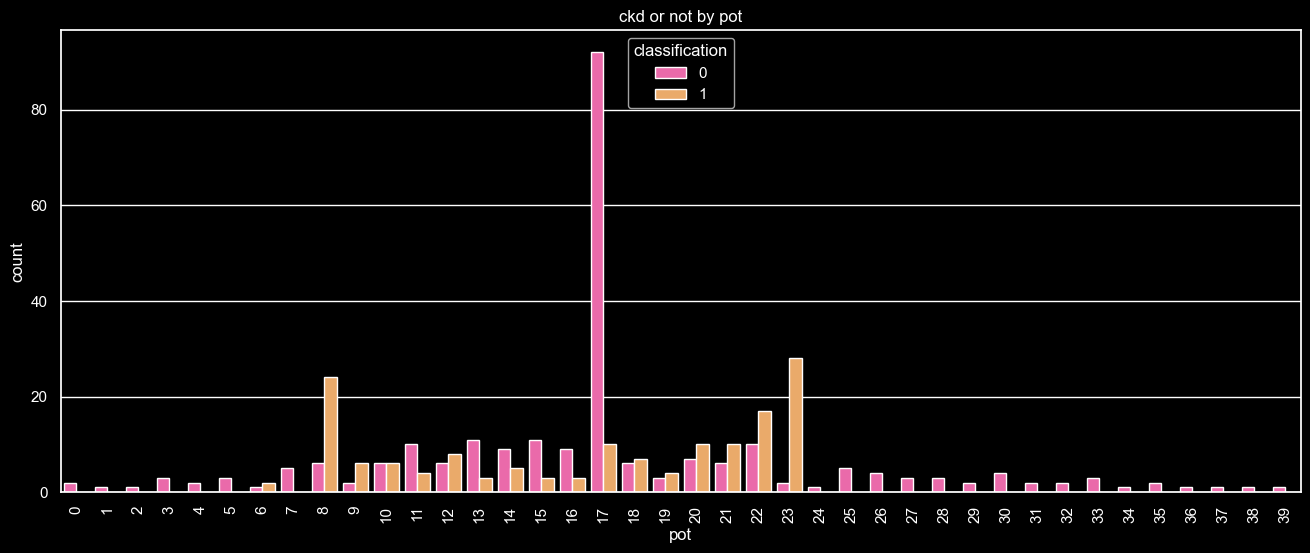

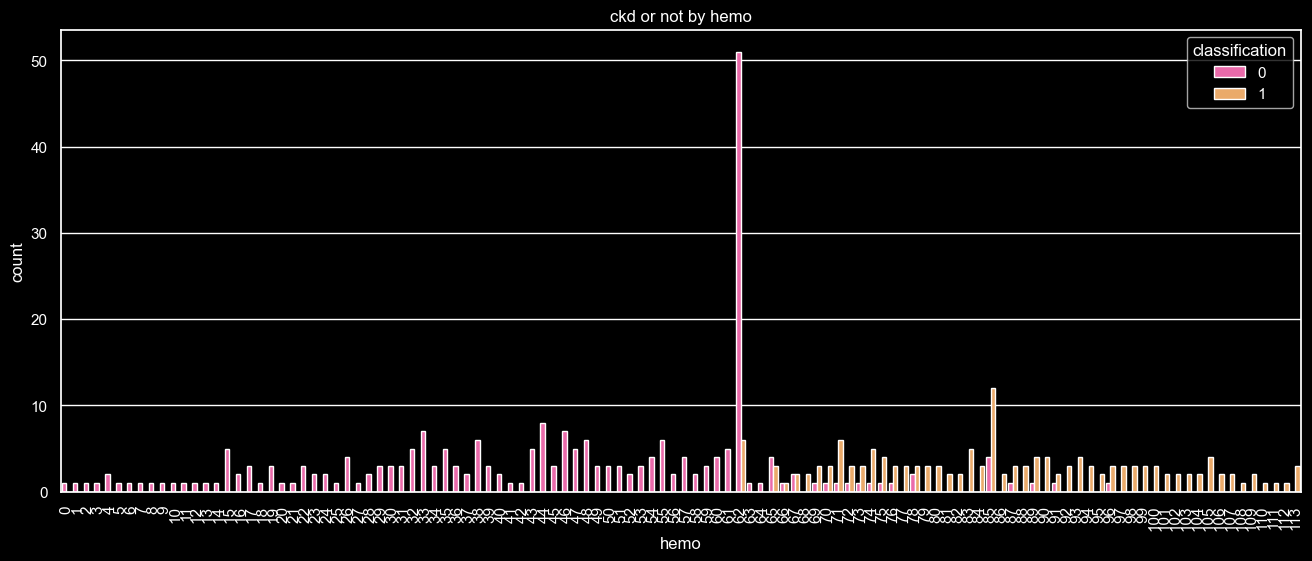

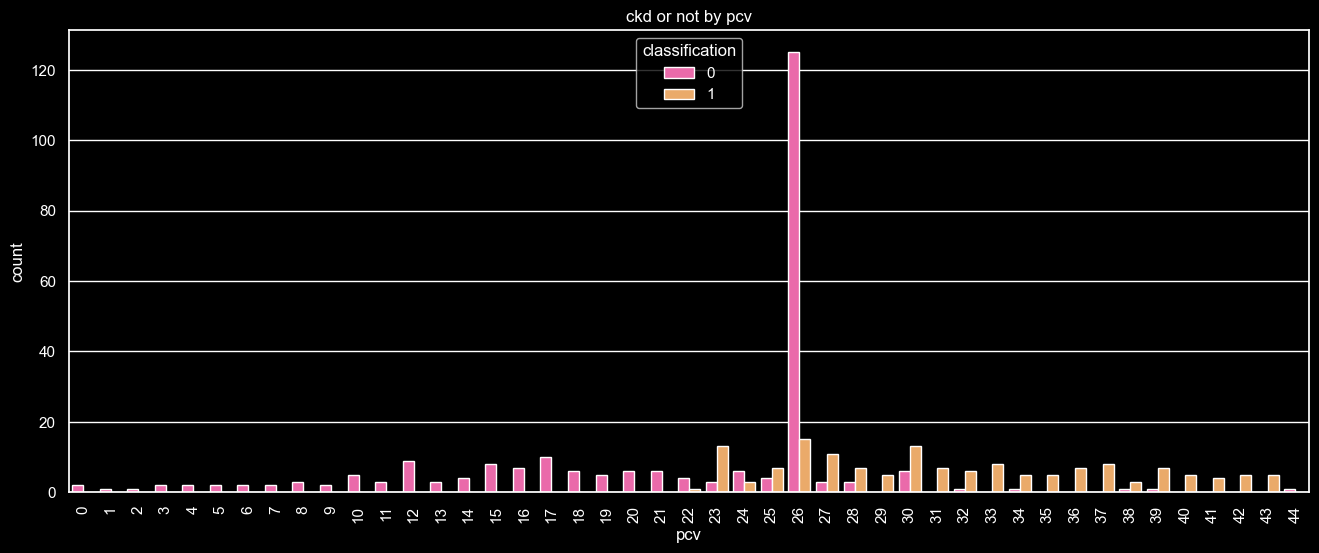

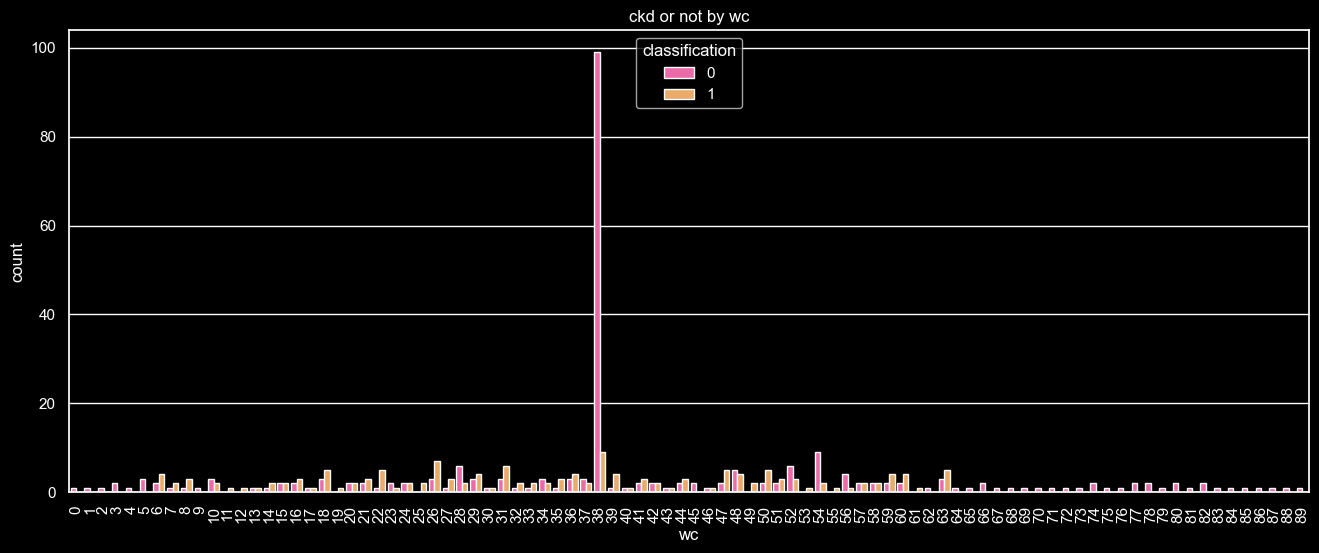

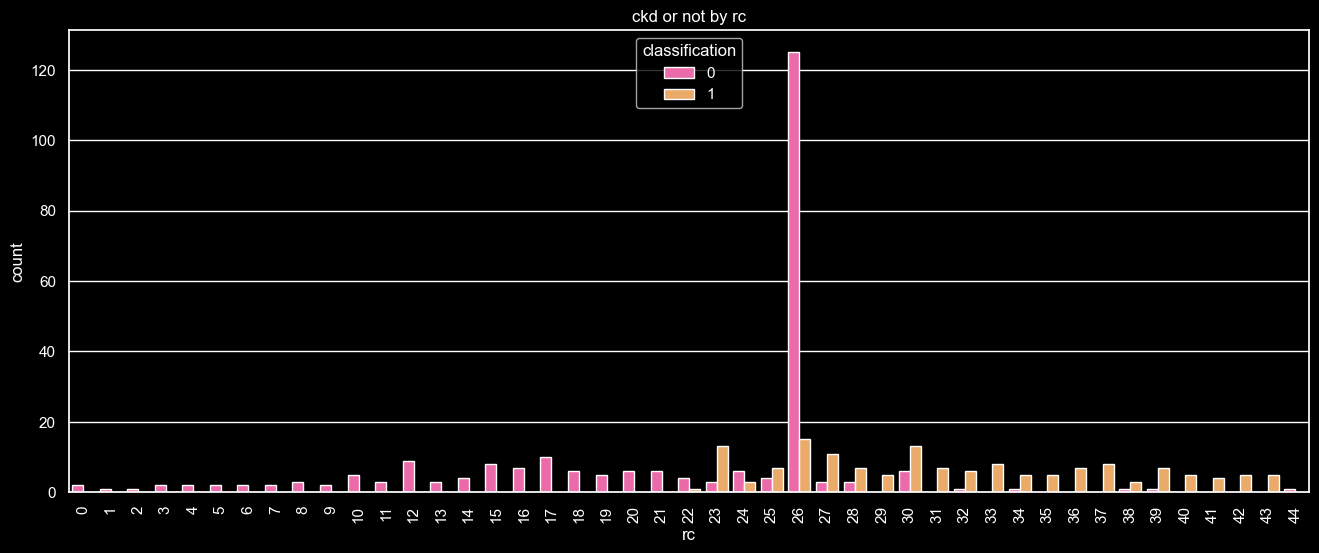

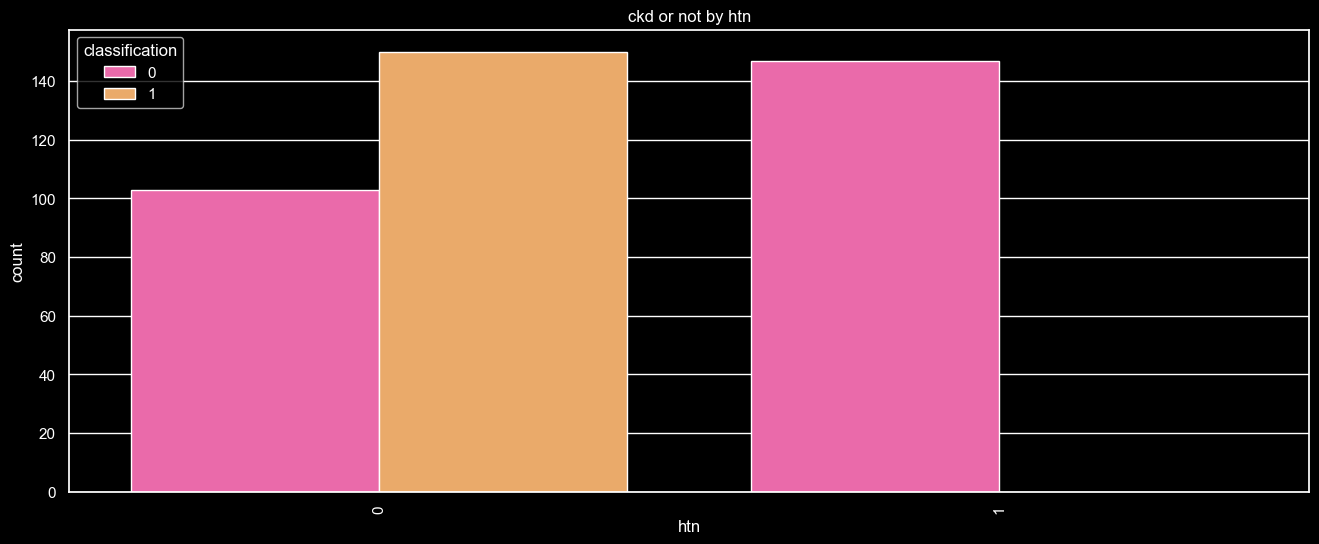

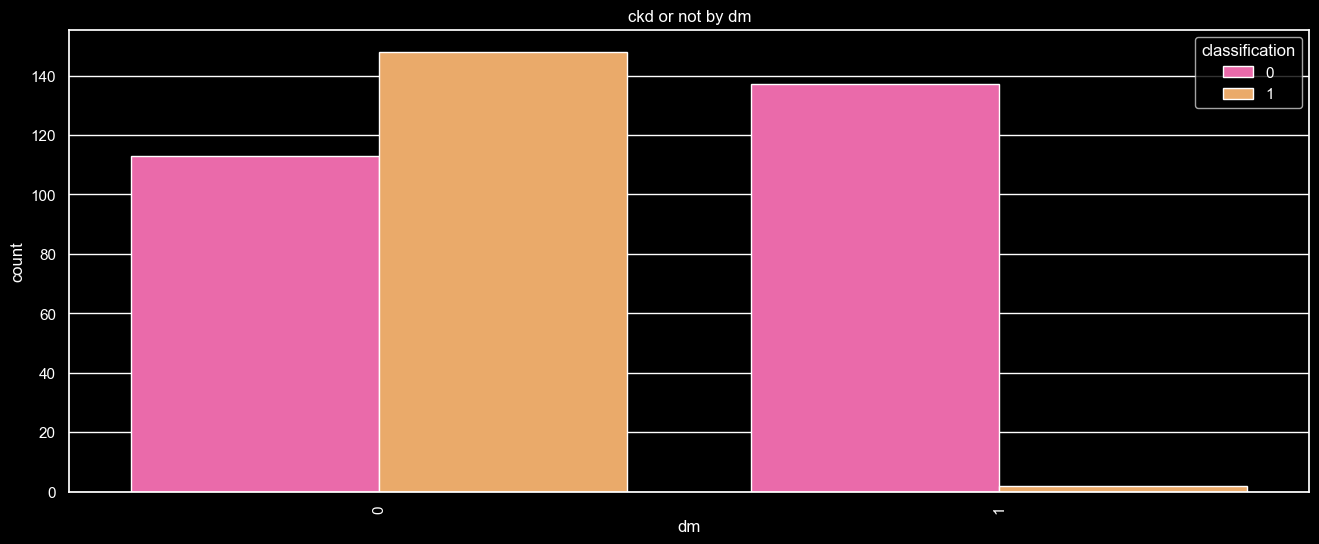

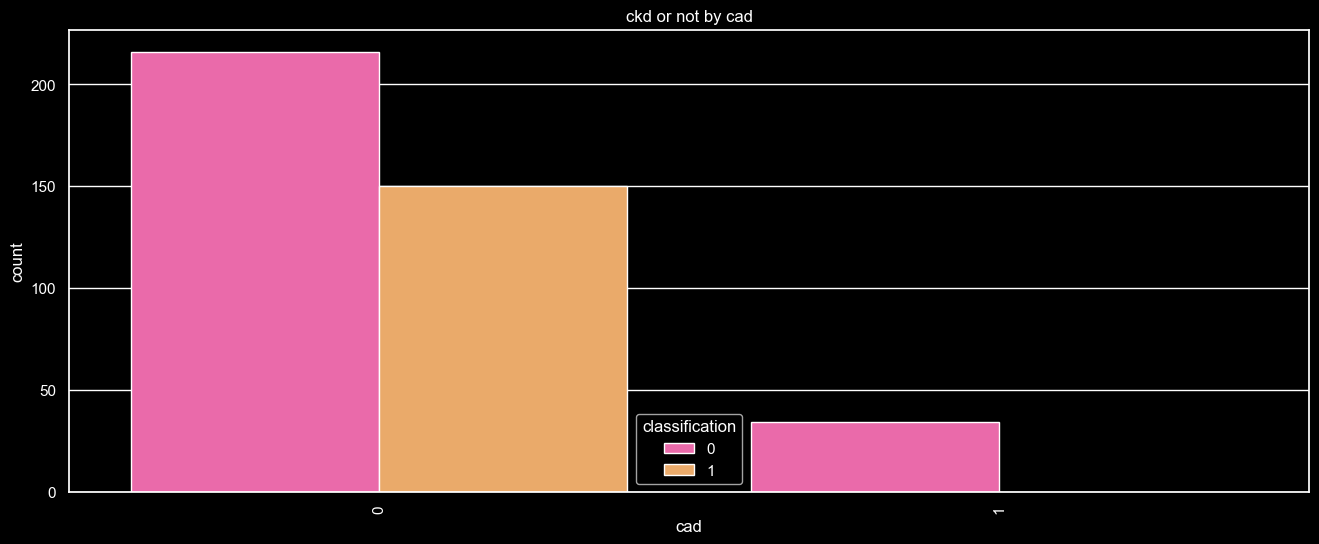

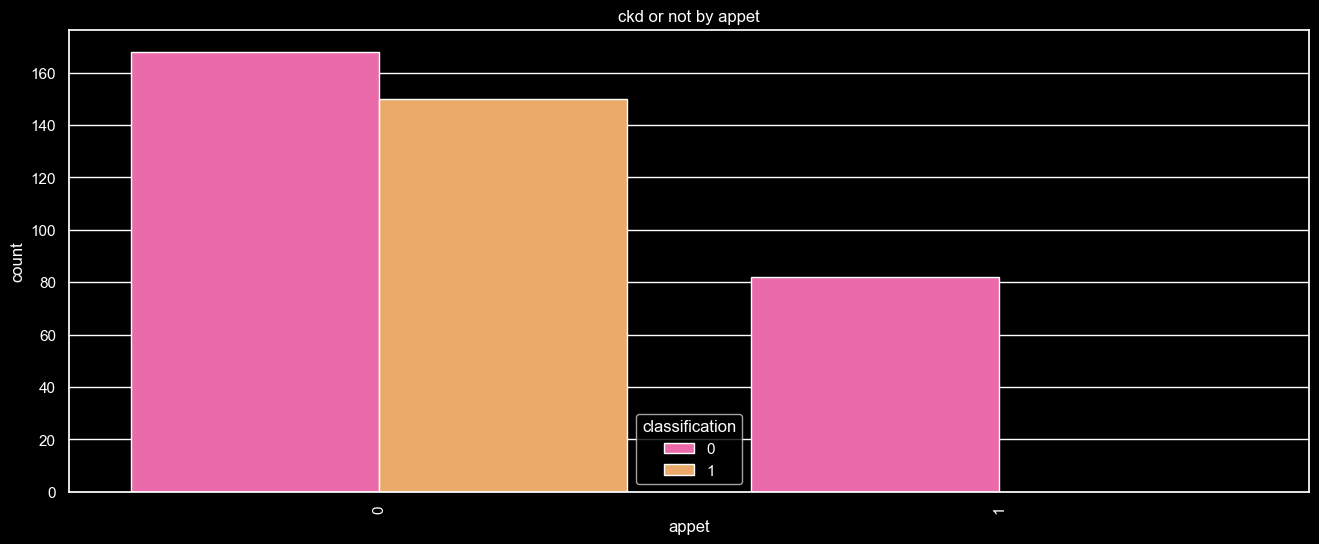

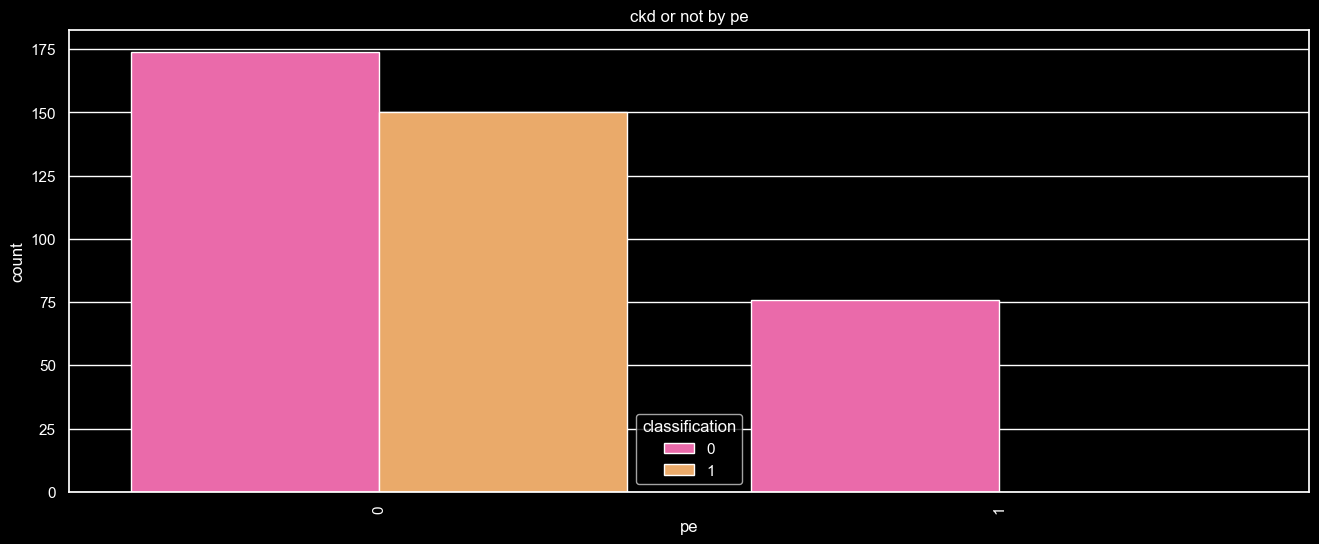

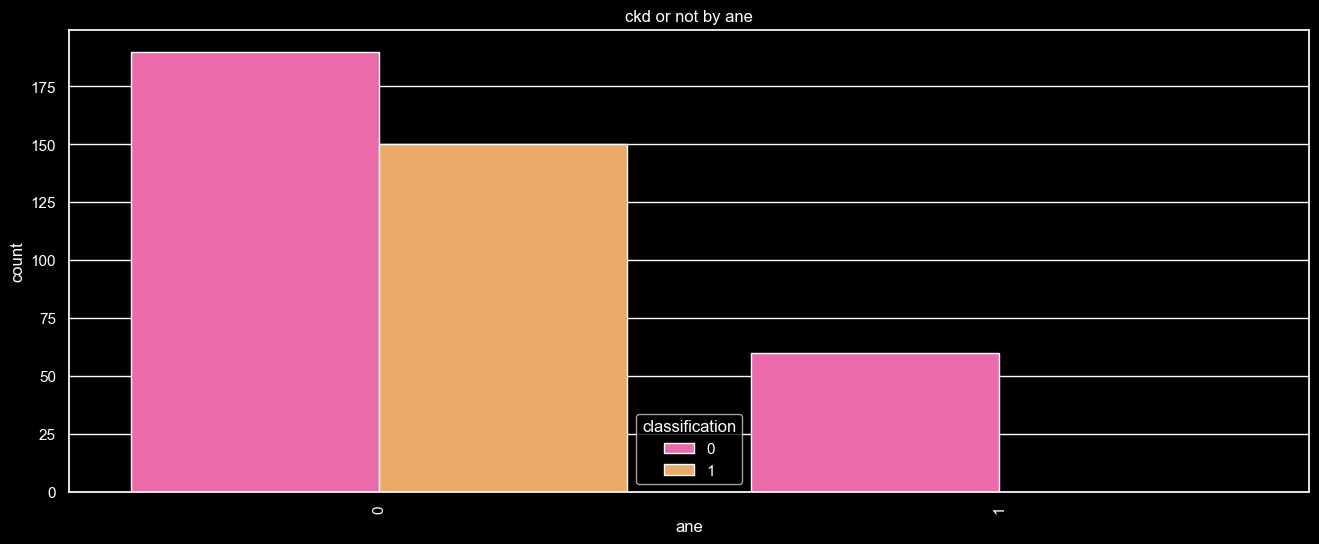

In [97]:
def plot(col):
    plt.style.use('dark_background')
    plt.figure(figsize=(16,6))
    plt.xticks(rotation = 90)
    ax = sns.countplot(x= dataset[col] , hue= dataset['classification'], palette ='spring')
    ax.set_title(f'ckd or not by {col}')
    plt.show()
    
for i in x.columns:
    plot(i)

# 🎯Distributions

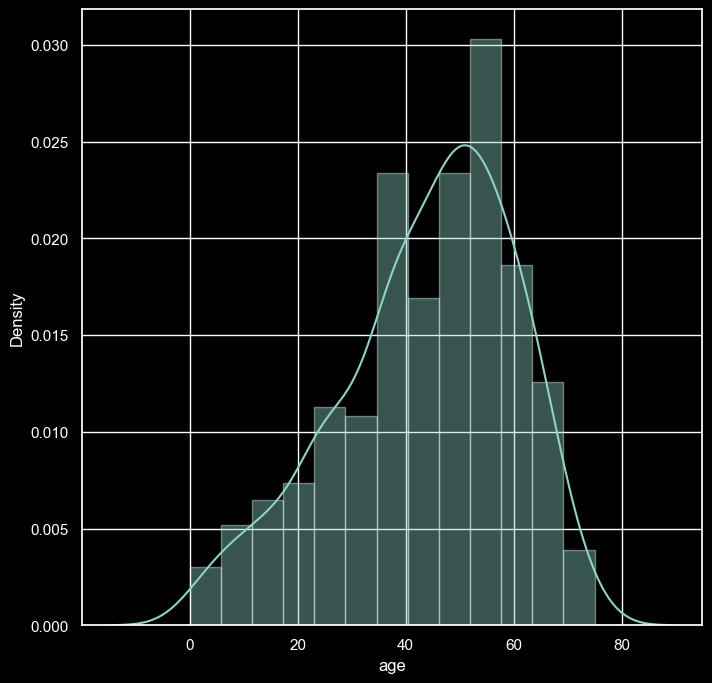

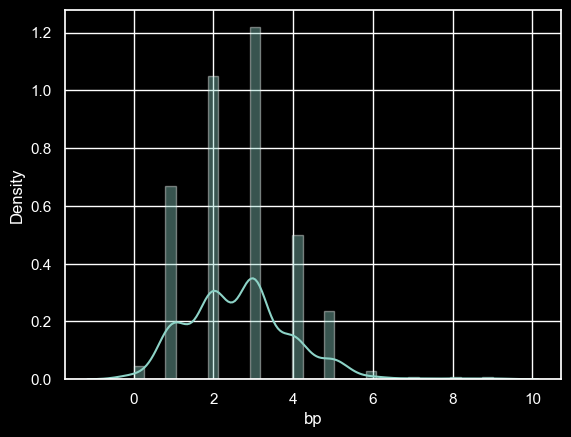

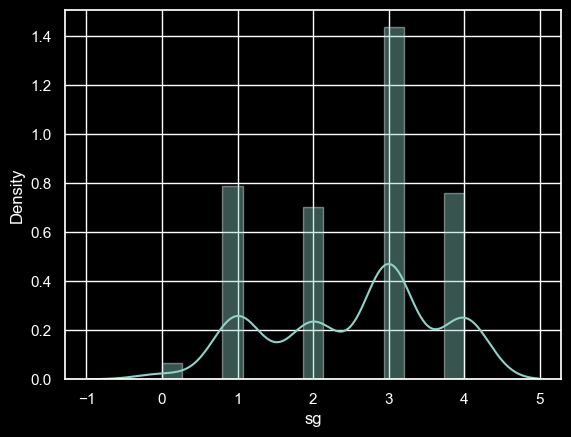

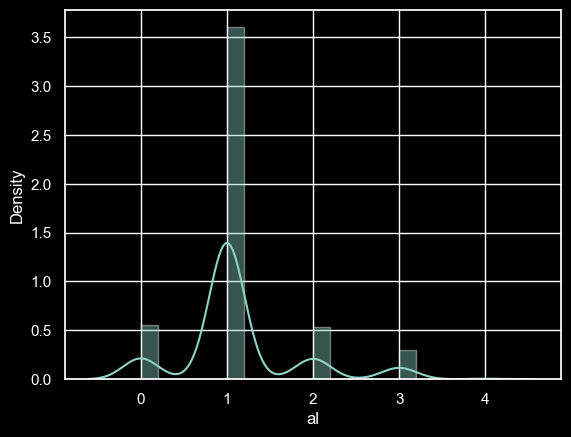

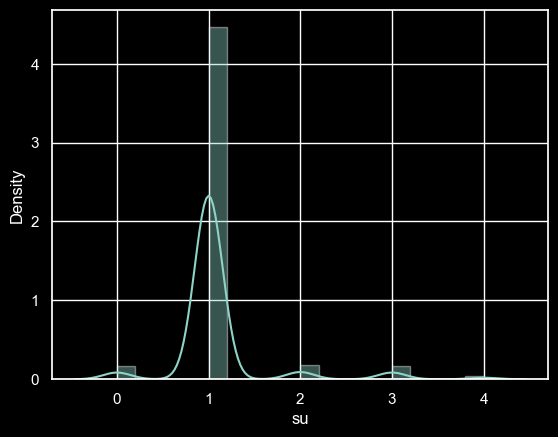

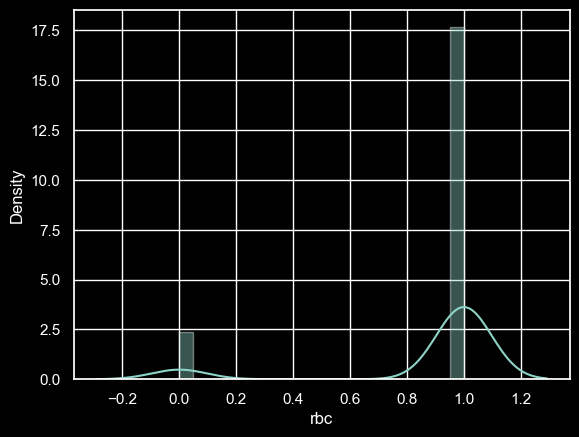

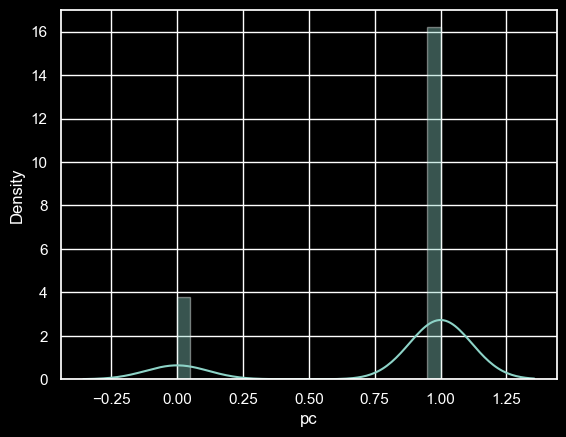

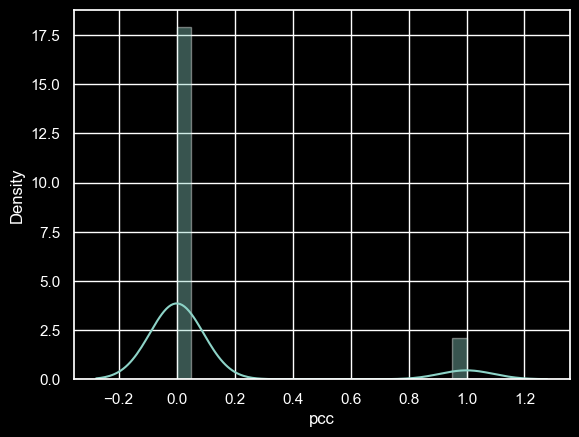

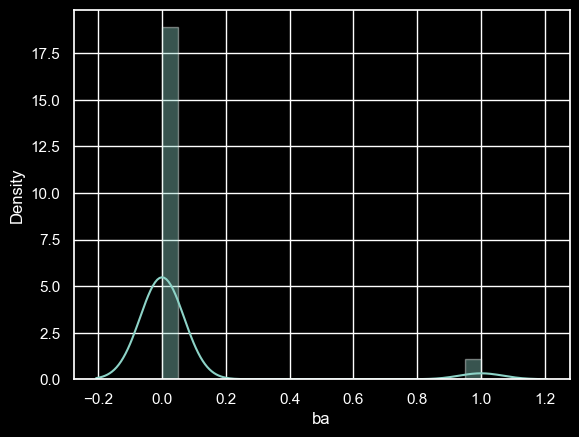

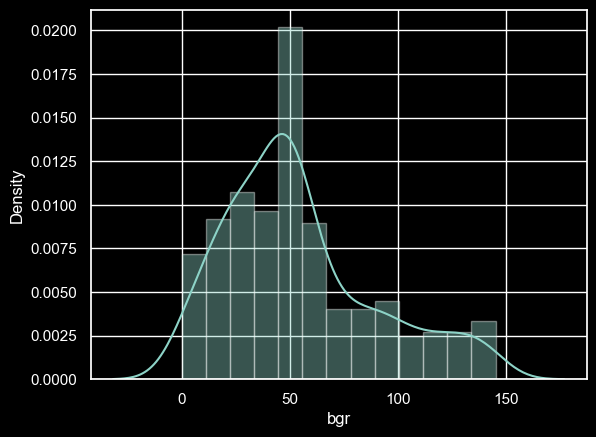

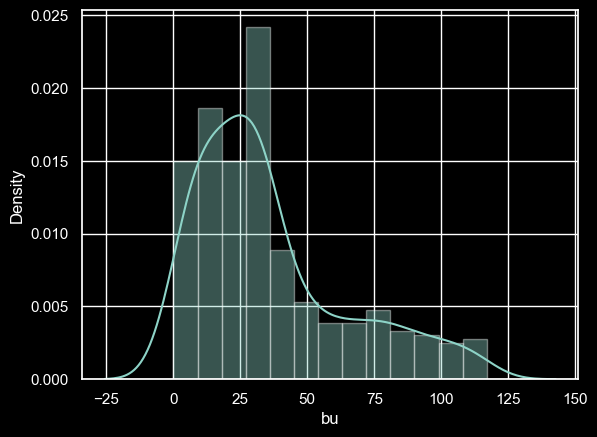

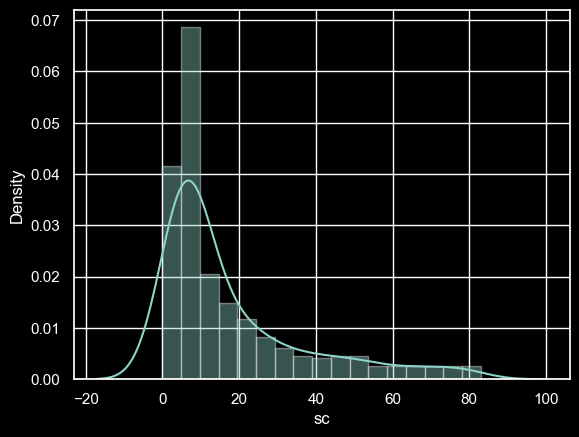

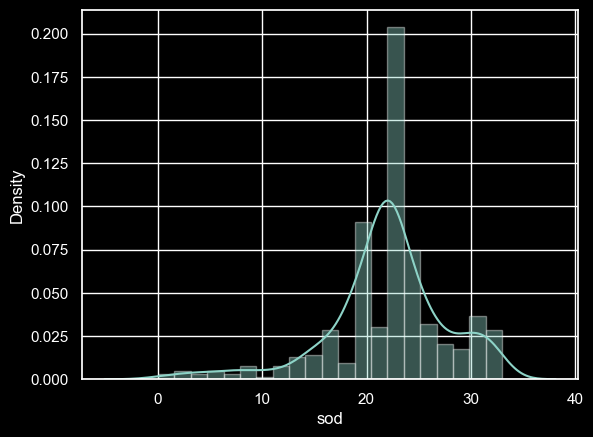

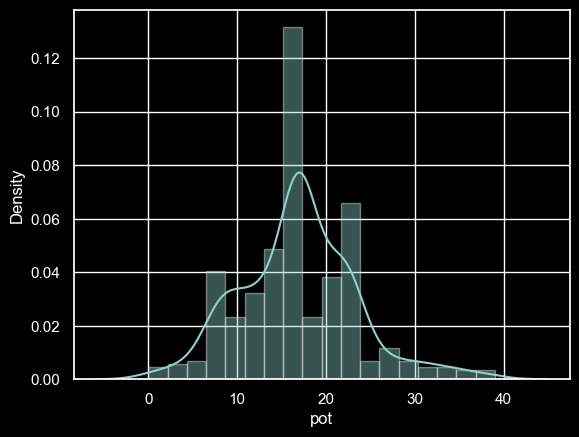

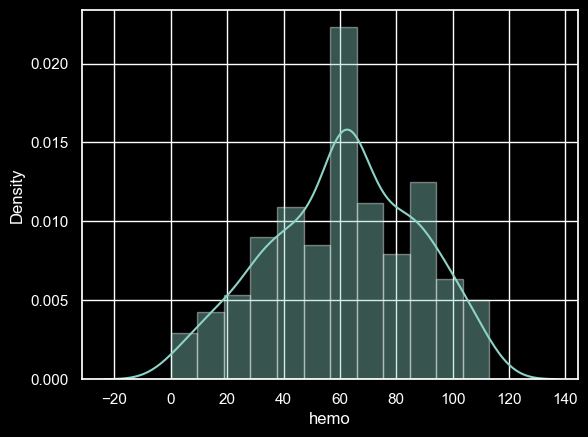

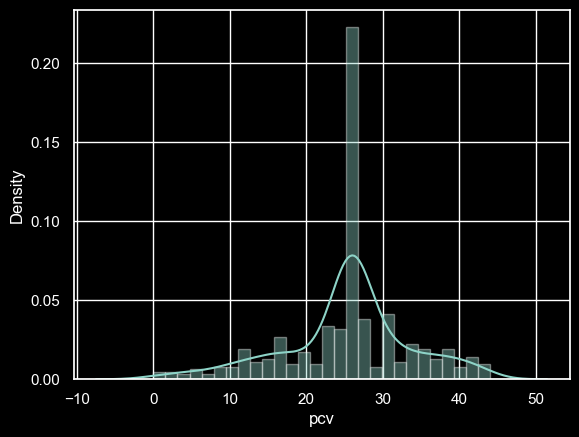

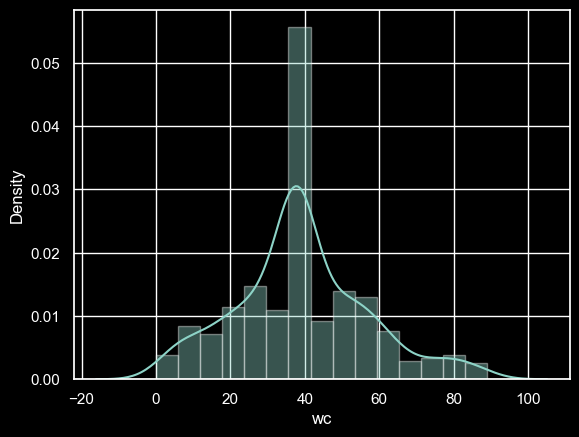

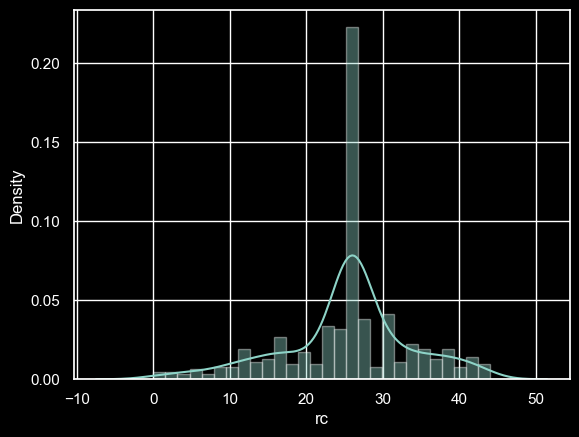

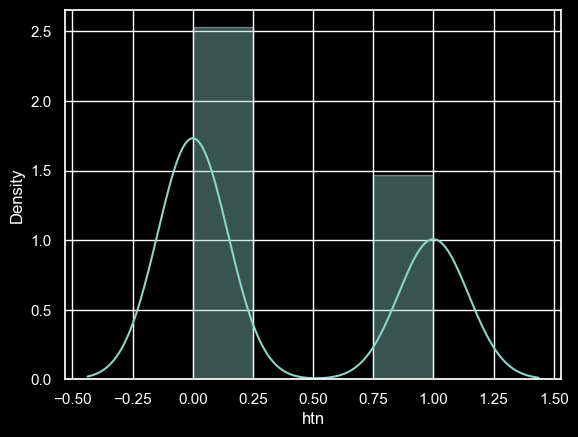

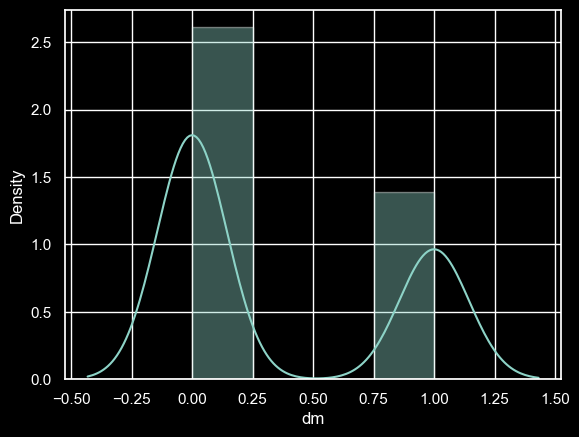

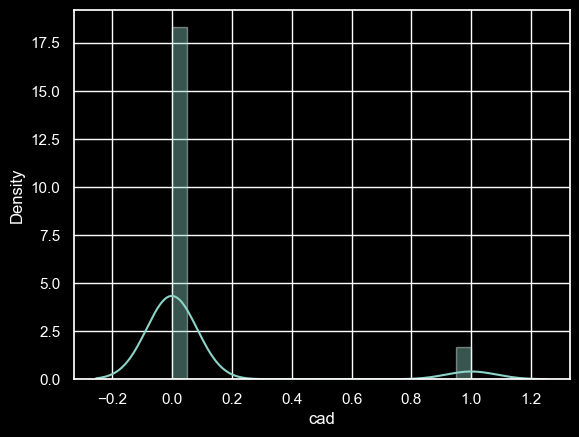

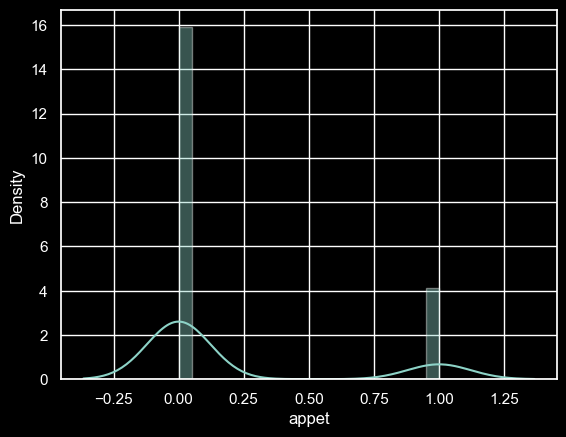

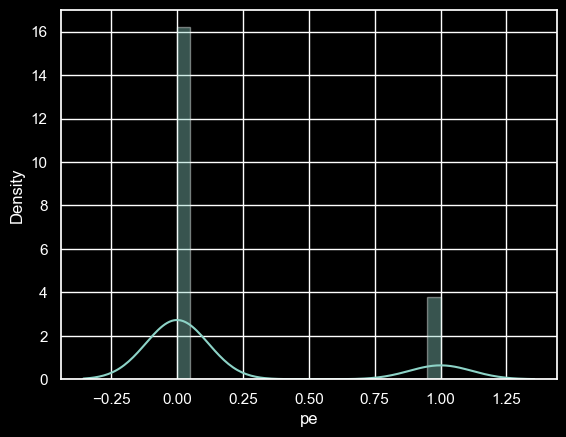

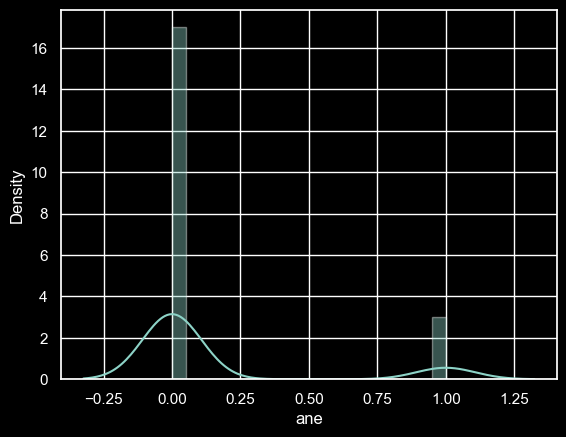

In [98]:
plt.figure(figsize=(8,8))
def dist(col):
    sns.distplot(dataset[col])
    plt.show()

for i in x.columns:
    dist(i)

# 🎯HeatMap

<AxesSubplot:>

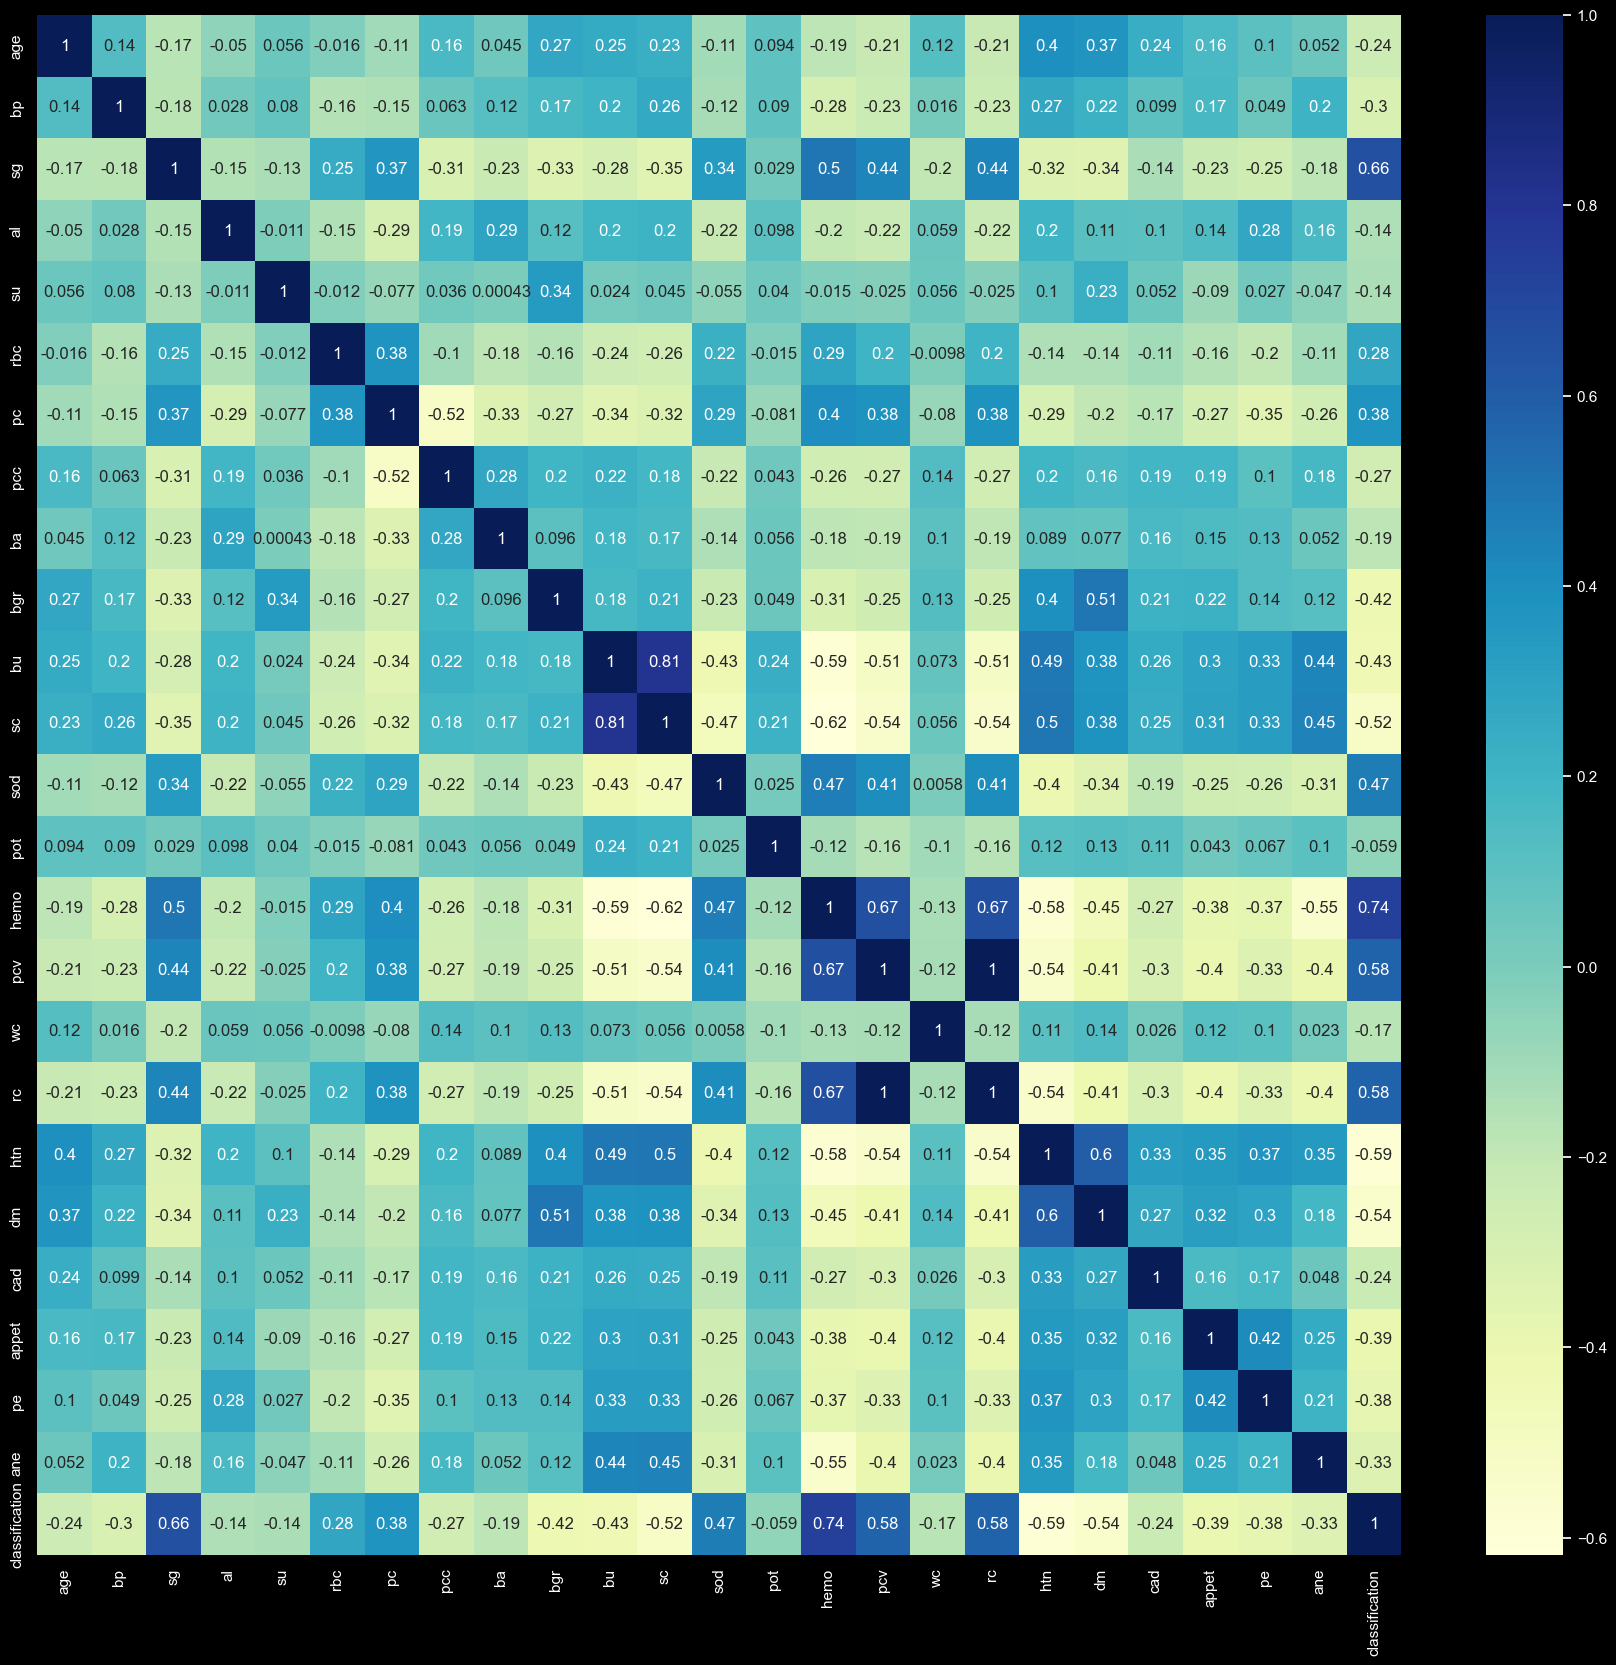

In [99]:
plt.figure(figsize=(22,20))
sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')

# 🎯Split data into Train and Test

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.25,random_state=2)

# 🎯BUILDING MODELS

In [101]:
#!pip install Xgboost

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [103]:
#logistic
logistic=LogisticRegression()

In [104]:
#DecisionTree
dtree=DecisionTreeClassifier()

In [105]:
#Bagging
bagg=BaggingClassifier()

In [106]:
#Randomforest
rf=RandomForestClassifier()

In [107]:
#Boosting
gdb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [108]:
#NAIVEBAYES
gnb=GaussianNB()
bnb=BernoulliNB()

In [109]:
#K nearest neighbor
knn=KNeighborsClassifier()

In [110]:
#SVM
svm=SVC()

In [135]:
list1=[(logistic,'logistic',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gdb,'GradientBoost',5),(xgb,'XGBoost',6),(gnb,'GradientNB',7),(bnb,'BernoulliNB',8),(knn,'KNN',9),(svm,'SVM',10)]

In [142]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Cross validation of {model_name}')
    Train_acc=cross_val_score(model,x_train,y_train,cv=10).mean()
    Test_acc=cross_val_score(model,x_test,y_test,cv=10).mean()
    varience=abs(Train_acc-Test_acc)
    print('Train accuracy:',Train_acc)
    print('Test accuracy:',Test_acc)
    print('varience:',varience)
    if varience>10 :
        print(f'Overfitting {model_name}')   

Cross validation of logistic
Train accuracy: 0.9866666666666667
Test accuracy: 0.96
varience: 0.026666666666666727
Cross validation of decisiontree
Train accuracy: 0.9600000000000002
Test accuracy: 0.95
varience: 0.010000000000000231
Cross validation of bagging
Train accuracy: 0.9666666666666666
Test accuracy: 0.97
varience: 0.0033333333333334103
Cross validation of randomforest
Train accuracy: 0.99
Test accuracy: 0.99
varience: 0.0
Cross validation of GradientBoost
Train accuracy: 0.99
Test accuracy: 0.97
varience: 0.020000000000000018
Cross validation of XGBoost
Train accuracy: 0.99
Test accuracy: 0.97
varience: 0.020000000000000018
Cross validation of GradientNB
Train accuracy: 0.9333333333333333
Test accuracy: 0.96
varience: 0.026666666666666616
Cross validation of BernoulliNB
Train accuracy: 0.9566666666666667
Test accuracy: 0.9099999999999999
varience: 0.046666666666666745
Cross validation of KNN
Train accuracy: 0.9733333333333334
Test accuracy: 0.9099999999999999
varience: 0.063

In [138]:
#classification report
from sklearn.metrics import classification_report
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Classification report of {model_name}')
    print('====================================================================')
    Train_cvr=classification_report(y_train,y_pred_train)
    Test_cvr=classification_report(y_test,y_pred_test)
    print('Train classification report:',Train_cvr)
    print('===================================================================')
    print('Test classification report:',Test_cvr)

Classification report of logistic
Train classification report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.99      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Test classification report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.95      1.00      0.97        35

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Classification report of decisiontree
Train classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       115

    accuracy            

Confusion matrix of logistic


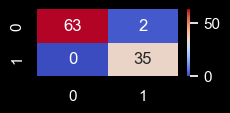

Confusion matrix of decisiontree


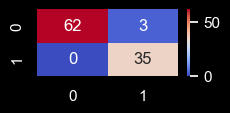

Confusion matrix of bagging


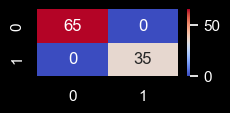

Confusion matrix of randomforest


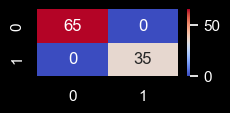

Confusion matrix of GradientBoost


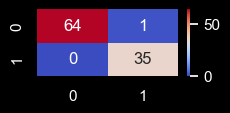

Confusion matrix of XGBoost


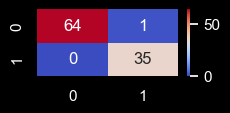

Confusion matrix of GradientNB


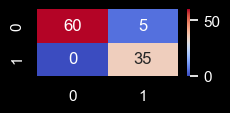

Confusion matrix of BernoulliNB


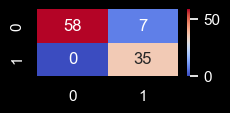

Confusion matrix of KNN


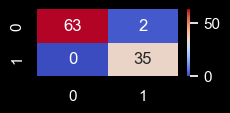

Confusion matrix of SVM


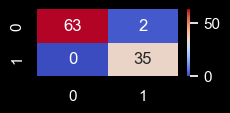

In [146]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred_test)
    print(f'Confusion matrix of {model_name}')
    plt.figure(figsize=(5,5))
    plt.subplot(5,2,i)
    sns.heatmap(cm,annot=True,cmap='coolwarm')
    plt.show()

# 🎯Receiver Operating Characteristic with Area Under Curve

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

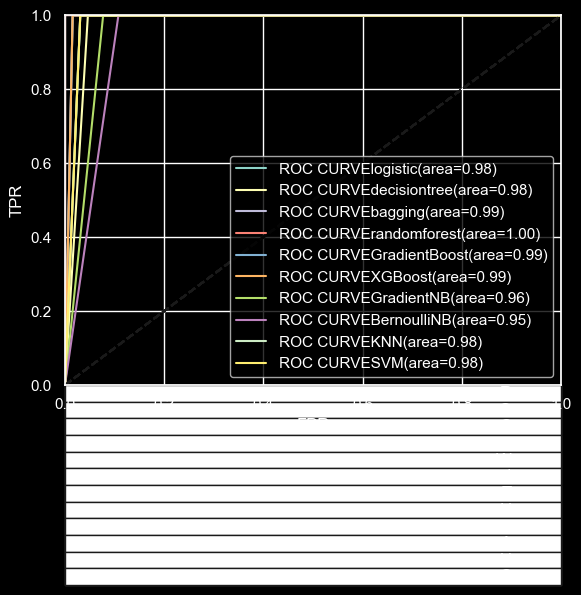

In [150]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    roc_auc=roc_auc_score(y_test,y_pred_test)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
    plt.plot(fpr,tpr,label=f'ROC CURVE{model_name}(area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.table('ROC WITH AUC')
    plt.legend(loc='lower right')
plt.show()

In [156]:
from sklearn.metrics import accuracy_score

In [162]:
acc_list=[]
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=accuracy_score(y_test,y_pred_test)
    acc_list.append(test_acc)

In [1]:
model=['logistic','decisiontree','bagging','randomforest','GradientBoost','XGBoost','GaussianNB','BernoulliNB','KNN','SVM']

In [171]:
acc_list

[0.98, 0.99, 0.98, 0.99, 0.99, 0.99, 0.95, 0.93, 0.98, 0.98]

In [172]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':acc_list})

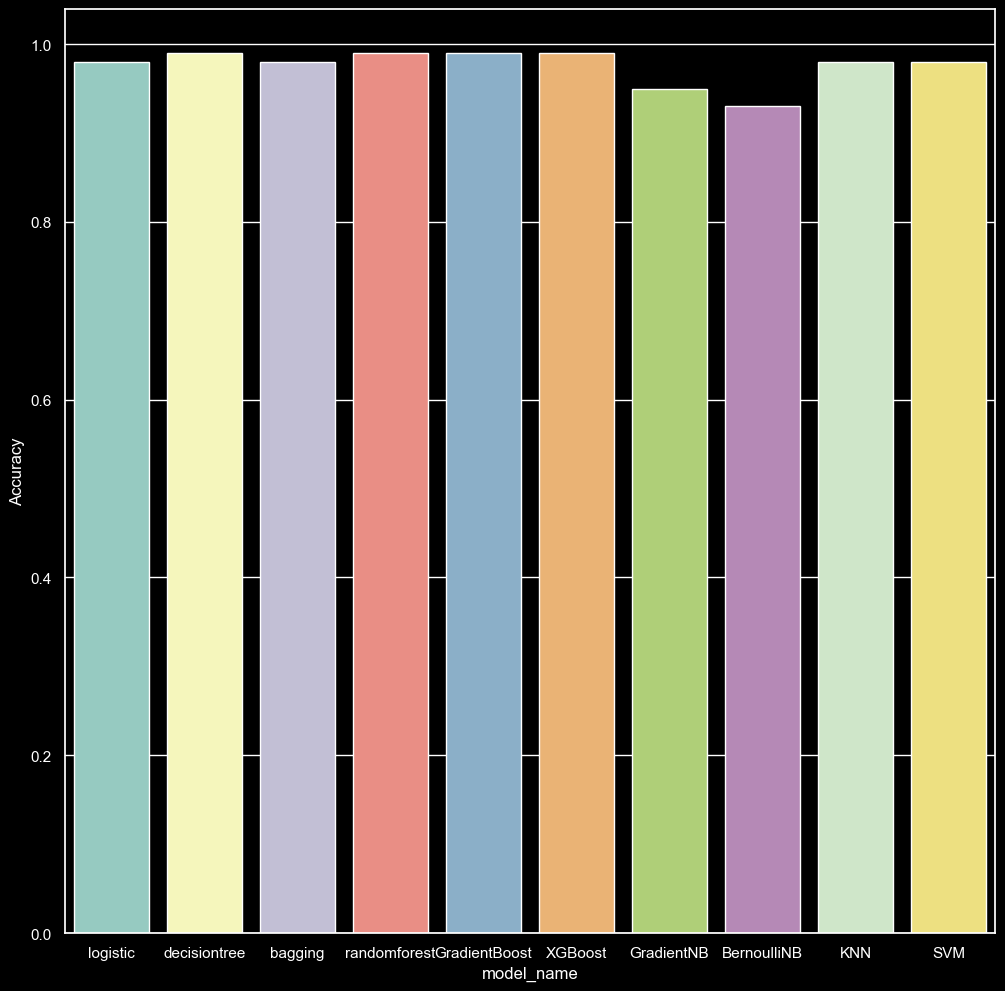

In [179]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Accuracy',data=metrics_df)
plt.show()

# 🎯Summary:

#### We can observe that all models predicted and gave best accuracy among all of them RandomForest gave best train accuracy of 99% and test accuracy of 99% with 'NO VARIENCE'

#### BEST MODEL:RANDOMFOREST